In [2]:
print("""
Author: Pushpa V J  
Email:pushpapraketh@gmail.com
***************************************************************************************************************************
Project on - SGD image classifier ML algorithm, Stratified fold, Cross validation, Confusion Matrics, Precision,
Recall, F1 score, Prcesion recall Trade off,  Precision_Recall curve, ROC Curve.
***************************************************************************************************************************
ML Algorithm: SGDClassifer- Stochasitic Gradient Descent algorithm
ML Algorithm type: Binary Image classifier 
ML Type: Superviosed ML
Why SGD: The SGD classifier has the advantage of being capable of handling very large datasets efficiently, as it deals
        with the training instances one at a time. Which internally makes SGD well suited for online learning as well
How SGD works: SGD classifier relies on randomness during training hence the name "Sochastic". If you want to reproduce
results, you should set the random_state parameter
***************************************************************************************************************************
Project Overview:
Download the mnist_784 version=1 data set from sklern.datasets under fetch_openml. The data set contains the list of images
for the handwritten numerical digits. 
The aim is to build an ML model to train the data set for identifying digit 5 using training data set and predict the 
number 5 image using test data set. 
Cross validate the built ML model and perform performance measures using following measurements,

Confusion Matrix,
precision scores,
recall score, 
precision recall trade off using decsion function,
precision recall curve,
ROC curve,
ROC AUC score, 
Draw a Conclusion.
***************************************************************************************************************************
Data set and library: From sklearn.datasets fetch_openml('mnist_784',version=1)
Data content: The data set contains list of images for handwritten numbers or digits

***************************************************************************************************************************
Libraries:
From Library                Import functions
sklearn.datasets            fetch_openml
sklearn.linear_model        SGDClassifier
sklearn.model_selection     StratifiedkFold
sklearn.base                clone
sklearn.base                BaseEstimator
sklearn.model_selection     cross_val_score
sklearn.model_selection     cross_val_predict
sklearn.metrics             confusion_matrix
sklearn.metrics             precision_score, recall_score
sklearn.metrics             f1_score
sklearn.metrics             precison_recall_curve
sklearn.metrics             roc_curve
sklearn.metrics             roc_auc_score
sklearn.ensemble            RandomForestClassifier
***************************************************************************************************************************
Date            Author             Change desription
14/05/2022      Pushpa V J         Build ML model to classify Hand written digits for 5 using SGDClassifer and perform the
                                   performance measure using various methods and functions.


***************************************************************************************************************************


""")


Author: Pushpa V J  
Email:pushpapraketh@gmail.com
***************************************************************************************************************************
Project on - SGD image classifier ML algorithm, Stratified fold, Cross validation, Confusion Matrics, Precision,
Recall, F1 score, Prcesion recall Trade off,  Precision_Recall curve, ROC Curve.
***************************************************************************************************************************
ML Algorithm: SGDClassifer- Stochasitic Gradient Descent algorithm
ML Algorithm type: Binary Image classifier 
ML Type: Superviosed ML
Why SGD: The SGD classifier has the advantage of being capable of handling very large datasets efficiently, as it deals
        with the training instances one at a time. Which internally makes SGD well suited for online learning as well
How SGD works: SGD classifier relies on randomness during training hence the name "Sochastic". If you want to reproduce
results, you 

# Get the Training data

In [3]:
# Scikit_learn provides many helper functions to downlaod popular data sets. MNIST is one of them.
from sklearn.datasets import fetch_openml

In [4]:
mnist=fetch_openml('mnist_784',version=1)

# MNIST consists of array of pixcel value for list of numerical digits images.

# Scikit_learn generraly have a simlar dictionay structure,including the following:
# * A DESCR key describing the dataset
# * A data key containing an array with one row per instance and one column per feature
# * A target key containing an array with the labels


In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [6]:
X=mnist['data']  # Get and set the  featured data
y=mnist['target']# Get and set the target data

In [7]:
# There are 70000 images adn each image has 784 features. This is because each image is 28 X 28 pixel, and each feature
# simply represents one pixel's intensity from 0(white) to 255(black).
print(X.shape) 
print(y.shape)

(70000, 784)
(70000,)


In [8]:
X[0]
# 

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

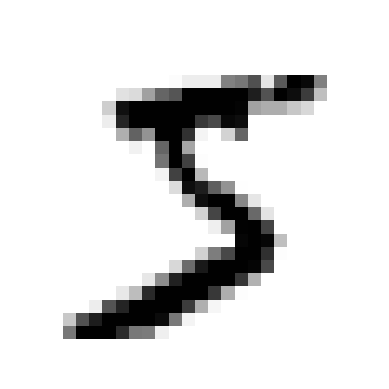

In [9]:
#Grab the instance's feature vector, reshape it to a 28X28 array and display it.
import matplotlib.pyplot as plt

some_instance=X[0]
some_instance_image=some_instance.reshape(28,28)

plt.imshow(some_instance_image,cmap='binary')
plt.axis('off')
plt.show()

In [10]:
y[0]

'5'

In [11]:
# Target data labele is string, ML algorithm expect numbers, so cast y to integer
import numpy as np
y=y.astype(np.uint8)
print(y[0])

5


# Perform Train and Test split

In [12]:
#Split the data into Train and Test data
X_train=X[:60000]
X_test=X[60000:]
y_train=y[:60000]
y_test=y[60000:]

In [13]:
#Set the target variable for identifying 5 digit only i.e for binary classifier
y_train_5=y_train==5
y_test_5=y_test==5

In [14]:
y_train_5 # target variable has data as True for digit 5 and False for non 5 

array([ True, False, False, ...,  True, False, False])

# Select the SGDClassifier for binary classification

In [15]:
#Select the classifier and train the model
from sklearn.linear_model import SGDClassifier

In [16]:
alg_SGD_clf=SGDClassifier(random_state=52) # you can tune the random_state to have better performance

# Train the SGDClassifier

In [17]:
alg_SGD_clf.fit(X_train,y_train_5) #fit and train the data to the classifier to identify digit 5

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=52, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
some_digit=X[0]

In [19]:
alg_SGD_clf.predict([some_digit]) #Take some known digit and check the prediction of the same

array([ True])

# Test the classifier

In [20]:
y_predict=alg_SGD_clf.predict(X_test) # Predict the test data for classifying yes or no for digit 5

In [21]:
alg_SGD_clf.predict([X_test[0]])

array([False])

In [22]:
y_test_5

array([False, False, False, ..., False,  True, False])

In [23]:
n_correct_pred=sum(y_predict==y_test_5) # get the number of correct prediction i.e predicting 5 as 5

In [24]:
print(n_correct_pred)

9690


In [25]:
print(n_correct_pred/len(y_predict)) 

0.969


# Measuring of Accuracy using self implimentation of cross validation

In [26]:
#measuring accuracy using self implimentaion of cross validation 
# We use the StratifiedFold class to perform stratified sampling that produces
# folds that contain a ratio for every class. Next, every iteration in the code will
# create a clone of the classifier to make predictions on the test fold. And finally, it
# will count the number of correct predictions and their ratio

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [27]:
skfolds=StratifiedKFold(n_splits=6,random_state=55)

C:\Users\pushpa javali\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [28]:
list(skfolds.split(X_train,y_train_5))

[(array([ 9957,  9959,  9960, ..., 59997, 59998, 59999]),
  array([    0,     1,     2, ..., 10421, 10432, 10434])),
 (array([    0,     1,     2, ..., 59997, 59998, 59999]),
  array([ 9957,  9959,  9960, ..., 20342, 20359, 20374])),
 (array([    0,     1,     2, ..., 59997, 59998, 59999]),
  array([19963, 19964, 19965, ..., 30012, 30020, 30028])),
 (array([    0,     1,     2, ..., 59997, 59998, 59999]),
  array([29997, 29998, 29999, ..., 40125, 40127, 40133])),
 (array([    0,     1,     2, ..., 59997, 59998, 59999]),
  array([39987, 39988, 39989, ..., 50142, 50155, 50166])),
 (array([    0,     1,     2, ..., 50142, 50155, 50166]),
  array([49985, 49986, 49987, ..., 59997, 59998, 59999]))]

In [29]:
count=0
for train_index, test_index in skfolds.split(X_train,y_train_5):
        clone_clf=clone(alg_SGD_clf)
        x_train_folds=X_train[train_index]
        y_train_folds=y_train_5[train_index]
        X_test_fold=X_train[test_index]
        y_test_fold=y_train_5[test_index]
        print('Train_index',train_index, 'Test_index=',test_index)
        count=count+1
        
        clone_clf.fit(x_train_folds,y_train_folds)
        y_pred=clone_clf.predict(X_test_fold)
        n_correct=sum(y_pred==y_test_fold)
        print(n_correct/len(y_pred))
print(count)

Train_index [ 9957  9959  9960 ... 59997 59998 59999] Test_index= [    0     1     2 ... 10421 10432 10434]
0.9037
Train_index [    0     1     2 ... 59997 59998 59999] Test_index= [ 9957  9959  9960 ... 20342 20359 20374]
0.8952
Train_index [    0     1     2 ... 59997 59998 59999] Test_index= [19963 19964 19965 ... 30012 30020 30028]
0.9658
Train_index [    0     1     2 ... 59997 59998 59999] Test_index= [29997 29998 29999 ... 40125 40127 40133]
0.9642
Train_index [    0     1     2 ... 59997 59998 59999] Test_index= [39987 39988 39989 ... 50142 50155 50166]
0.9654
Train_index [    0     1     2 ... 50142 50155 50166] Test_index= [49985 49986 49987 ... 59997 59998 59999]
0.9624
6


# Measure the accuracy using cross_val_score function

In [30]:
#using cross_val_score() function

from sklearn.model_selection import cross_val_score

In [31]:
#Using readymade SKlearn corss validation funtion 
cross_val_score(alg_SGD_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.961  , 0.9569 , 0.96185])

# Accuracy measurment is not prefferred performance measure for classifier

In [32]:
#Accuracy is generally not the preferred perfomance measure for classifiers, especially when you are dealing
#with skewed data set(i.e. wehn some classes are much more frequent than others)
#Let us look at the dumb classifer that just classifes every single image in the not-5 class i.e it classifies each
#and every instance as not-5 only i.e false result only for all the instances.
#With this dummy false classifier also the accuracy is above 90% hence accuracy is not a good measure for classifiers.
# For the output, you'll get no less than 90%: only 10% of the images are 5s, so we
# can always imagine that an image is not a 5. We'll be right about 90% of the time.
from sklearn.base import BaseEstimator
import numpy as np

class Never5classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool) #just returns the zero in boolian i.e. False for the length of X values
    
never_5_clf=Never5classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")
        
    

array([0.91125, 0.90855, 0.90915])

In [33]:
alg_never_clf=Never5classifier()

In [34]:
alg_never_clf.fit(X_train,y_train_5)

In [35]:
alg_never_clf.predict(X_test)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [36]:
some_digit=X[0]
alg_never_clf.predict(some_digit)

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [37]:
len(some_digit)

784

In [38]:
len(alg_never_clf.predict(some_digit)) #returns False value for the length of some_digit

784

# Measuring the model performance using Confusion Matrix

In [39]:
# Confusion Matrix
# There is a better method to evaluate the performance of your classifier: the  confusion matrix.

from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(alg_SGD_clf,X_train,y_train_5,cv=3)

# Just like the cross_val_score() function, cross_val_predict() performs K-fold cross_validation, 
# but instead of retruning the evaluation scrores, it retursn the predictions made on each test fold.
# This means that you get a clean prediction for each instance in the training set("clean meaing that the
# prediction is made by a  model that never saw the data durint training).
#Here y_train_pred contains the clean predicted value of target variable for each X_Train instance it is not the test 
#set prediction.






In [40]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [41]:
y_test_pred=alg_SGD_clf.predict(X_test)

In [42]:
number_correct=sum(y_test_pred==y_test_5)

In [43]:
number_correct

9690

In [44]:
number_correct2=sum(y_train_pred==y_train_5)

In [45]:
number_correct2

57595

# Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)
#Syntax confusion_matrix(actual,predicted)

#                            Predicted  (y_train_pred)
#                               0            1
#Actual(y_train_5)    N  0      TN          FP        
#                     P  1      FN          TP        

#TN= Actually negetive and predicted also negative
#FN= Actually possitve but predicted as negative
#FP=Actually negative but predicted as possitive
#TP=Actually postive and predicted also positive


#              TP
# precision = ------ i.e. In the total of predicted positvies how many were actually possitive
#             TP+FP 

#              TP
# Recall  =  -------- i.e. In the total of Actual positives how many were correctly predicted as possitives
#             TP+FN
#
#                TP               Precision X Recall 
# F1 score = -----------   = 2 x--------------------- = i.e F1 score is harmonic mean of precsion and Recall
#            TP+(FN+FP)           Precision + Recall
#               --------
#                  2
## Regaular mean treates all value as equal where as Harmonic mean gives more weightage to low values.
## You will get High F1 score only when both recall and precision are high. F1 score is a combine measure of precison and
# Recall.
#F1 score favors the classifier that has precision and recall as similar to each other. This is not which we want always.
#i.e. in some context we prefer having more precision and in some other context we prefer having more recall. 

#In the scenario in which we want all the predicted positives should be of only actual positives. i.e we do not want
#wrong thing also predicted as possitive. That time we use precision where False positive should be zero. i.e if some
#of the actual positives are being predicted as negative is fine but actual negatives being predicted as possitive is
# not acceptable. Example: Classifying the list of videos for kids watch, i.e. classifying some of the good vedias as bad
# video is fine but bad vedio should not be classified as good video for kid to watch. So we look for high precision 
# classifier over here.

#In the scenario in which we want all actual possitives must be predicted as possitives only, we do not want to treat
#actual possitive as negative. Here predicting some actual negatives as possitive is fine but none of the actual possitives
# should be predicted as negative.Example: Classifying the shoplifter CC TV images, i.e. classifying some of the
# non shoplifter image as possitive is fine but it is important that all the actual shop lifter should be predicted as 
# possitive.So we look for high Recall classifier over here.


# Note: Increasing precision reduces the recall and vise versa. This is called as precision recall TRADE OFF.


array([[53506,  1073],
       [ 1332,  4089]], dtype=int64)

In [47]:
y_perfect_prediction=y_train_5
confusion_matrix(y_train_5,y_perfect_prediction)
#In case of perfect predictions prediction should match with actuals i.e. predicted negatives should be same as actual 
#negatives and predicted possitives should be same as actual positives only.


array([[54579,     0],
       [    0,  5421]], dtype=int64)

# Precision Recall calculations

In [48]:
#Precision Recall calculations
from sklearn.metrics import precision_score, recall_score
print(f"Precision = {precision_score(y_train_5,y_train_pred)}") #i.e out of all 5's detected by the model only 79% of them
                                                             #were correct remaining 21% were falsly detected as 5
print(f"Recall = {recall_score(y_train_5,y_train_pred)}") # i.e. out of all actuall 5's only 75% of them were identified as 
                                                         # 5 remaining 25% of the actual 5's were not identified as 5

Precision = 0.7921348314606742
Recall = 0.7542888765910348


# F1 score calculation

In [49]:
#F1 score calculation
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7727487479920626

# Precision Recall Trade off

In [50]:
#Precision Recall Trade off
#As the redusing the recall increases the precision and vise versa which is called as precision Recall trade off i.e.
#if the possitive predictions made by the model contains only actual possitives with out any actual negatives then
#the precision is high and low recall.
#The SGD classifier uses "decision" function to handle the Precision Recall Trade off.
#What id does is for each instance it finds the decion score and compares that score with the given threshold, if the 
# computed score is greater than the given threshold then it classify that instance as +ve other wise as negative.
#How does this works?
#Let us consider the SGD model is classifying the images as 5's and not 5's, in that case through decision function
# it computes the decision score for each image and comapare the score with given threshold, if it is greater than the 
#threshold value then it classifies that image as +ve other wise it classify that as -ve.
#Let us consider the below are the classification done by the SGD for couple of images
#8 7 3 9 5 2 5 5 6 5 5 5 
#             ^ Threshold with precision as 80% = 4 TP /4 TP+1FP= 4/5 = 80 %, recall = 4 TP/4TP+2 FN = 4/6= 67%
#with having the threshold at given point the precision is 80% and recall is 67%. But if we increase the threshold to after
# 6 at right side then it increases the precison = 3TP/3TP+0FP=1=100% but it decrease the recall = 3TP/3TP+3FN=3/6=50%.
#conversly lowering the threshold will increase the recall and decreases the prescion. i.e. Threshold and recall are 
# -vely co-related, and threshold and precision are usually +vely co-related, however some times precision may decrease
          # with increase of threshold.


y_scores= alg_SGD_clf.decision_function([some_digit])
y_scores

array([807.04578696])

In [51]:
threshold=0
y_some_digit_pred=(y_scores>threshold) #classifies the some digit as +ve
y_some_digit_pred

array([ True])

In [52]:
threshold=8000
y_some_digit_pred=(y_scores > threshold)# classifies the some digit as -ve
y_some_digit_pred

array([False])

In [53]:
#using cross_val_prediction() with specifying decision_function instead of scores
# Decision_function 
# it computes the decision score for each image and comapare the score with given threshold, if it is greater than the 
#threshold value then it classifies that image as +ve other wise it classify that as -ve.
y_scores=cross_val_predict(alg_SGD_clf, X_train,y_train_5,cv=3, method='decision_function')
y_scores # contains the scores only

array([  9270.60464207, -21101.03245908, -32413.75228177, ...,
        10700.68228158, -13587.25182637, -13072.33678438])

# Precision_recall curve

In [54]:
#Precision_recall curve
from sklearn.metrics import precision_recall_curve

In [68]:
print("""Using the decision_function score, precision_recall_curve computes the precision and recall for all the possible thresholds.\n""")
precision,recall,thresholds=precision_recall_curve(y_train_5,y_scores) 
print(f"Precisions = {precision}")
print(f"Recalls = {recall}")
print(f"Thresholds = {thresholds}")

Using the decision_function score, precision_recall_curve computes the precision and recall for all the possible thresholds.

Precisions = [0.09044044 0.09042527 0.09042677 ... 1.         1.         1.        ]
Recalls = [1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
Thresholds = [-107871.97232304 -107213.71551601 -106956.3346596  ...   41137.40365034
   46761.37038506   46931.55525592]


In [56]:
print(len(precision))
print(len(precision[:-1]))
print(len(thresholds))
print(len(recall))

59941
59940
59940
59941


In [57]:
print(thresholds)

[-107871.97232304 -107213.71551601 -106956.3346596  ...   41137.40365034
   46761.37038506   46931.55525592]


In [58]:
for i in precision:
    print(i)

0.09044044044044044
0.09042526568678157
0.09042677433347793
0.09042828303051538
0.09042979177789642
0.0904313005756236
0.0904328094236994
0.09043431832212638
0.09043582727090703
0.09043733627004388
0.09043884531953947
0.09044035441939628
0.09044186356961688
0.09044337277020374
0.09044488202115943
0.09044639132248644
0.0904479006741873
0.09044941007626454
0.09045091952872067
0.09045242903155822
0.09045393858477971
0.09045544818838766
0.0904569578423846
0.09045846754677303
0.09045997730155551
0.09046148710673454
0.09046299696231265
0.09046450686829235
0.0904660168246762
0.09046752683146668
0.09046903688866634
0.09047054699627768
0.09047205715430326
0.09047356736274559
0.09047507762160718
0.09047658793089057
0.09047809829059829
0.09047960870073285
0.09048111916129678
0.09048262967229262
0.09048414023372287
0.09048565084559007
0.09048716150789676
0.09048867222064544
0.09049018298383865
0.09049169379747893
0.09049320466156877
0.09049471557611073
0.09049622654110732
0.09049773755656108
0.090

0.09194328890398167
0.0919448500696166
0.09194641128826855
0.09194797255994024
0.09194953388463432
0.09195109526235354
0.09195265669310058
0.09195421817687814
0.09195577971368893
0.09195734130353564
0.09195890294642099
0.09196046464234767
0.09196202639131838
0.09196358819333582
0.09196515004840271
0.09196671195652174
0.09196827391769562
0.09196983593192704
0.0919713979992187
0.09197296011957334
0.09197452229299363
0.09197608451948229
0.09197764679904201
0.0919792091316755
0.09198077151738547
0.09198233395617463
0.09198389644804567
0.09198545899300128
0.09198702159104422
0.09198858424217715
0.09199014694640278
0.09199170970372383
0.091993272514143
0.09199483537766301
0.09199639829428653
0.09199796126401631
0.09199952428685503
0.09200108736280539
0.09200265049187012
0.09200421367405193
0.09200577690935349
0.09200734019777755
0.0920089035393268
0.09201046693400394
0.09201203038181169
0.09201359388275276
0.09201515743682985
0.09201672104404568
0.09201828470440294
0.09201984841790437
0.0920

0.09341389728096677
0.09341550997859265
0.0934171227319027
0.09341873554089983
0.09342034840558693
0.09342196132596685
0.09342357430204251
0.09342518733381677
0.09342680042129253
0.09342841356447268
0.0934300267633601
0.09343164001795766
0.09343325332826827
0.0934348666942948
0.09343648011604012
0.09343809359350716
0.09343970712669879
0.09344132071561788
0.09344293436026732
0.09344454806065002
0.09344616181676885
0.09344777562862669
0.09344938949622644
0.093451003419571
0.09345261739866323
0.09345423143350605
0.09345584552410231
0.09345745967045493
0.0934590738725668
0.0934606881304408
0.0934623024440798
0.09346391681348672
0.09346553123866443
0.09346714571961584
0.09346876025634382
0.09347037484885128
0.09347198949714108
0.09347360420121614
0.09347521896107934
0.09347683377673358
0.09347844864818174
0.09348006357542672
0.09348167855847139
0.09348329359731869
0.09348490869197146
0.09348652384243263
0.09348813904870505
0.09348975431079166
0.09349136962869534
0.09349298500241897
0.093494

0.09407774589094704
0.0940793821964031
0.09408101855878107
0.09408265497808391
0.09408429145431459
0.09408592798747609
0.09408756457757136
0.09408920122460339
0.09409083792857516
0.09409247468948961
0.09409411150734974
0.09409574838215852
0.0940973853139189
0.09409902230263387
0.0941006593483064
0.09410229645093945
0.09408653595226082
0.09408817286614009
0.09408980983697827
0.09409144686477834
0.09409308394954329
0.09409472109127605
0.09409635828997964
0.09409799554565701
0.09409963285831115
0.09410127022794501
0.09410290765456159
0.09410454513816385
0.09410618267875476
0.09410782027633731
0.09410945793091446
0.0941110956424892
0.0941127334110645
0.09411437123664335
0.0941160091192287
0.09411764705882353
0.09411928505543082
0.09412092310905357
0.09412256121969473
0.09412419938735728
0.09412583761204421
0.09412747589375849
0.09412911423250309
0.094130752628281
0.0941323910810952
0.09413402959094865
0.09413566815784435
0.09413730678178527
0.09413894546277439
0.09414058420081468
0.0941422

0.09479795145222393
0.09479961413663071
0.09480127687936296
0.09480293968042376
0.09480460253981618
0.09480626545754328
0.09480792843360814
0.09480959146801382
0.0948112545607634
0.09481291771185994
0.09481458092130653
0.09481624418910622
0.09481790751526209
0.0948195708997772
0.09482123434265465
0.09482289784389747
0.09482456140350877
0.0948262250214916
0.09482788869784904
0.09482955243258417
0.09483121622570005
0.09483288007719975
0.09483454398708636
0.09483620795536293
0.09483787198203257
0.09483953606709832
0.09484120021056326
0.09484286441243046
0.09484452867270303
0.094846192991384
0.09484785736847647
0.09484952180398351
0.09485118629790819
0.09485285085025358
0.09485451546102278
0.09485618013021885
0.09485784485784486
0.0948595096439039
0.09486117448839904
0.09486283939133335
0.09486450435270992
0.09486616937253181
0.09486783445080212
0.09486949958752391
0.09487116478270027
0.09487283003633427
0.094874495348429
0.09487616071898752
0.09487782614801292
0.09487949163550828
0.094881

0.09615213404319724
0.09615384615384616
0.09615555832546877
0.0961572705580683
0.09615898285164806
0.09616069520621127
0.0961624076217612
0.0961641200983011
0.09616583263583424
0.09616754523436387
0.09616925789389325
0.09617097061442564
0.09617268339596431
0.0961743962385125
0.09615829875149162
0.096160011398853
0.09616172410722237
0.09616343687660302
0.0961651497069982
0.09616686259841117
0.0961685755508452
0.09617028856430353
0.09617200163878943
0.09617371477430617
0.09617542797085701
0.0961771412284452
0.09617885454707402
0.09618056792674672
0.09618228136746655
0.0961839948692368
0.09618570843206072
0.09618742205594157
0.09618913574088261
0.09619084948688711
0.09619256329395834
0.09619427716209956
0.09619599109131403
0.09619770508160502
0.09619941913297579
0.0962011332454296
0.09620284741896973
0.09620456165359943
0.09620627594932198
0.09620799030614063
0.09620970472405867
0.09621141920307934
0.09621313374320592
0.09621484834444168
0.09621656300678987
0.09621827773025378
0.096219992

0.09767265093383524
0.09767441860465116
0.09767618633945054
0.09767795413823684
0.09767972200101353
0.09768148992778411
0.09768325791855204
0.09768502597332078
0.09768679409209383
0.09768856227487466
0.09769033052166673
0.09769209883247353
0.09769386720729853
0.09769563564614521
0.09769740414901705
0.09769917271591752
0.0977009413468501
0.09770271004181828
0.09770447880082551
0.0977062476238753
0.09770801651097111
0.09770978546211641
0.0977115544773147
0.09771332355656945
0.09771509269988413
0.09771686190726223
0.09771863117870723
0.0977204005142226
0.09772216991381183
0.0977239393774784
0.0977257089052258
0.0977274784970575
0.09772924815297697
0.0977310178729877
0.09773278765709319
0.0977345575052969
0.09773632741760231
0.09773809739401293
0.09773986743453222
0.09774163753916366
0.09774340770791075
0.09774517794077696
0.09774694823776578
0.0977487185988807
0.09775048902412518
0.09775225951350275
0.09775403006701684
0.09775580068467098
0.09775757136646863
0.09775934211241329
0.09776111

0.09878216280560388
0.09878397187019267
0.0987857810010439
0.09878759019816125
0.09878939946154833
0.09879120879120878
0.09879301818714628
0.09879482764936444
0.09879663717786692
0.09879844677265734
0.09880025643373935
0.0988020661611166
0.09880387595479274
0.0988056858147714
0.09880749574105621
0.09880930573365085
0.09881111579255894
0.09881292591778412
0.09881473610933006
0.09881654636720039
0.09881835669139874
0.09882016708192877
0.09882197753879413
0.09882378806199846
0.09882559865154542
0.09882740930743862
0.09882922002968175
0.09883103081827843
0.09883284167323231
0.09883465259454706
0.0988364635822263
0.09883827463627369
0.09884008575669287
0.09884189694348751
0.09884370819666123
0.0988455195162177
0.09884733090216057
0.09884914235449348
0.09885095387322008
0.09885276545834402
0.09885457710986896
0.09885638882779856
0.09885820061213643
0.09886001246288625
0.09886182438005169
0.09886363636363636
0.09886544841364395
0.09886726053007808
0.09886907271294243
0.09887088496224063
0.098

0.10031441275511153
0.10031627906976744
0.10031814545386891
0.1003200119074198
0.10032187843042402
0.10032374502288542
0.10032561168480789
0.1003274784161953
0.10032934521705153
0.10033121208738045
0.10033307902718595
0.1003349460364719
0.10033681311524219
0.10033868026350069
0.10034054748125128
0.10034241476849784
0.10034428212524425
0.1003461495514944
0.10034801704725216
0.10034988461252141
0.10035175224730603
0.10035361995160991
0.10035548772543691
0.10035735556879094
0.10035922348167588
0.1003610914640956
0.10034434620753839
0.10034621398257762
0.10034808182715038
0.10034994974126056
0.10035181772491204
0.10035368577810871
0.10035555390085445
0.10035742209315314
0.10035929035500865
0.1003611586864249
0.10036302708740576
0.1003648955579551
0.10036676409807682
0.1003686327077748
0.10037050138705293
0.1003723701359151
0.10037423895436519
0.1003761078424071
0.10037797680004469
0.10037984582728186
0.10038171492412253
0.10038358409057054
0.10038545332662979
0.1003873226323042
0.100389192

0.10264030174877128
0.10264225706284648
0.10264421245142116
0.10264616791449963
0.10264812345208611
0.10265007906418487
0.10265203475080019
0.10265399051193629
0.10265594634759745
0.10265790225778794
0.102659858242512
0.1026618143017739
0.10266377043557791
0.10266572664392828
0.10266768292682926
0.10266963928428514
0.10267159571630016
0.10267355222287859
0.10267550880402469
0.10267746545974274
0.10267942219003696
0.10268137899491167
0.10268333587437109
0.10268529282841951
0.10268724985706118
0.10268920696030037
0.10269116413814135
0.10269312139058837
0.10269507871764572
0.10269703611931764
0.10269899359560841
0.1027009511465223
0.10270290877206359
0.10270486647223652
0.10270682424704537
0.10270878209649441
0.1027107400205879
0.10271269801933011
0.10271465609272533
0.10271661424077781
0.10271857246349182
0.10272053076087163
0.10272248913292154
0.10272444757964576
0.10272640610104862
0.10272836469713435
0.10273032336790726
0.1027322821133716
0.10273424093353163
0.10273619982839165
0.1027

0.10355564097635979
0.10355763132099406
0.10355962174213885
0.10356161223979857
0.10356360281397763
0.10356559346468044
0.10356758419191142
0.10356957499567498
0.10357156587597555
0.10357355683281752
0.1035755478662053
0.10357753897614333
0.103579530162636
0.10358152142568776
0.10358351276530299
0.10358550418148611
0.10358749567424155
0.10358948724357372
0.10359147888948704
0.10359347061198593
0.1035954624110748
0.10359745428675807
0.10359944623904015
0.10360143826792548
0.10360343037341845
0.1036054225555235
0.10360741481424506
0.10360940714958752
0.10361139956155532
0.10361339205015288
0.10361538461538461
0.10361737725725495
0.1036193699757683
0.10362136277092909
0.10362335564274175
0.1036253485912107
0.10362734161634035
0.10362933471813514
0.10363132789659947
0.1036333211517378
0.10363531448355454
0.1036373078920541
0.10363930137724091
0.1036412949391194
0.10364328857769399
0.10364528229296913
0.10364727608494921
0.10364926995363868
0.10365126389904197
0.1036532579211635
0.103655252

0.10449035011153138
0.10449237692516584
0.10449440381743061
0.10449643078833024
0.10449845783786929
0.10450048496605238
0.10450251217288405
0.1045045394583689
0.1045065668225115
0.10450859426531642
0.10451062178678824
0.10451264938693156
0.10451467706575093
0.10451670482325094
0.10451873265943618
0.10452076057431121
0.10452278856788064
0.10452481664014901
0.10452684479112094
0.104528873020801
0.10453090132919375
0.1045329297163038
0.10453495818213572
0.10453698672669409
0.1045390153499835
0.10454104405200854
0.10454307283277378
0.1045451016922838
0.10454713063054322
0.10454915964755657
0.10455118874332849
0.10455321791786353
0.10455524717116628
0.10455727650324133
0.10455930591409328
0.10456133540372671
0.1045633649721462
0.10456539461935634
0.10456742434536173
0.10456945415016694
0.10457148403377657
0.1045735139961952
0.10457554403742744
0.10457757415747787
0.10457960435635107
0.10458163463405164
0.10458366499058416
0.10458569542595325
0.10458772594016347
0.10458975653321943
0.1045917

0.10549299911877019
0.10549506501644995
0.10549713099504533
0.10549919705456112
0.10550126319500205
0.1055033294163729
0.1055053957186784
0.1055074621019233
0.10550952856611238
0.1055115951112504
0.10551366173734208
0.1055157284443922
0.10551779523240554
0.10551986210138682
0.10552192905134082
0.10552399608227228
0.10552606319418598
0.10552813038708667
0.1055301976609791
0.10553226501586804
0.10553433245175825
0.10553639996865449
0.10553846756656153
0.10554053524548411
0.105542603005427
0.10554467084639499
0.1055467387683928
0.10554880677142521
0.105550874855497
0.1055529430206129
0.1055550112667777
0.10555707959399616
0.10555914800227303
0.10556121649161311
0.10556328506202113
0.10556535371350186
0.10556742244606009
0.10556949125970055
0.10557156015442805
0.10557362913024733
0.10557569818716316
0.1055777673251803
0.10557983654430354
0.10558190584453765
0.10558397522588737
0.10558604468835751
0.1055881142319528
0.10559018385667804
0.10559225356253797
0.1055943233495374
0.10559639321768

0.10633171386815184
0.10633381391582565
0.10633591404645283
0.10633801426003832
0.106340114556587
0.10634221493610381
0.10634431539859367
0.10634641594406147
0.10634851657251215
0.10635061728395062
0.1063527180783818
0.1063548189558106
0.10635691991624195
0.10635902095968076
0.10636112208613197
0.10636322329560047
0.1063653245880912
0.10636742596360907
0.10636952742215901
0.10637162896374593
0.10637373058837475
0.10637583229605042
0.10637793408677784
0.10638003596056193
0.10638213791740762
0.10638423995731984
0.10638634208030351
0.10638844428636354
0.10639054657550488
0.10639264894773244
0.10639475140305114
0.10639685394146592
0.1063989565629817
0.1064010592676034
0.10640316205533597
0.10640526492618431
0.10640736788015337
0.10640947091724806
0.10641157403747332
0.10641367724083407
0.10641578052733526
0.1064178838969818
0.10641998734977862
0.10642209088573067
0.10642419450484285
0.10642629820712013
0.10642840199256741
0.10643050586118963
0.10643260981299174
0.10643471384797865
0.106436

0.10751657480629444
0.10751872191712432
0.10752086911371171
0.10752301639606175
0.10752516376417959
0.10752731121807034
0.10752945875773917
0.1075316063831912
0.10753375409443157
0.10753590189146543
0.10753804977429793
0.10754019774293419
0.10754234579737935
0.10754449393763857
0.107546642163717
0.10754879047561974
0.10755093887335197
0.10755308735691883
0.10755523592632546
0.107557384581577
0.1075595333226786
0.10756168214963541
0.10756383106245256
0.1075659800611352
0.10756812914568849
0.10757027831611755
0.10757242757242758
0.10757457691462367
0.107576726342711
0.1075788758566947
0.10758102545657995
0.10758317514237187
0.10758532491407562
0.10758747477169633
0.1075896247152392
0.10759177474470934
0.1075939248601119
0.10759607506145207
0.10759822534873496
0.10760037572196575
0.10760252618114957
0.10760467672629159
0.10760682735739698
0.10760897807447085
0.10761112887751839
0.10761327976654474
0.10761543074155507
0.10761758180255451
0.10761973294954826
0.10762188418254143
0.1076240355

0.1087707950112187
0.1087729937335759
0.10877519254482605
0.10877739144497453
0.10877959043402673
0.10878178951198804
0.10878398867886384
0.10878618793465955
0.10878838727938055
0.10879058671303223
0.10879278623561998
0.10879498584714921
0.10879718554762531
0.10879938533705366
0.10880158521543967
0.10880378518278874
0.10880598523910626
0.10880818538439763
0.10881038561866824
0.10881258594192349
0.10881478635416877
0.1088169868554095
0.10881918744565107
0.10882138812489889
0.10882358889315834
0.10882578975043482
0.10882799069673374
0.10883019173206052
0.10883239285642052
0.10883459406981918
0.10883679537226189
0.10883899676375404
0.10884119824430105
0.10884339981390832
0.10884560147258127
0.10884780322032526
0.10885000505714575
0.10885220698304811
0.10885440899803775
0.10885661110212008
0.10885881329530052
0.10886101557758446
0.10886321794897733
0.1088654204094845
0.10886762295911141
0.10886982559786347
0.10887202832574608
0.10887423114276465
0.1088764340489246
0.10887863704423131
0.108

0.10977152182782537
0.10977376119463882
0.1097760006528214
0.10977824020237877
0.10978047984331647
0.1097827195756401
0.10978495939935529
0.10978719931446759
0.10978943932098262
0.10979167941890595
0.10979391960824321
0.10979615988899998
0.10979840026118184
0.10980064072479442
0.10980288127984328
0.10980512192633404
0.10980736266427231
0.10980960349366366
0.10981184441451369
0.10981408542682802
0.10981632653061224
0.10981856772587195
0.10982080901261276
0.10982305039084025
0.10982529186056005
0.10982753342177773
0.10982977507449891
0.1098320168187292
0.1098342586544742
0.10983650058173951
0.10983874260053073
0.10984098471085346
0.10984322691271332
0.1098454692061159
0.10984771159106684
0.10984995406757171
0.10985219663563613
0.1098544392952657
0.10985668204646605
0.10985892488924277
0.10986116782360147
0.10986341084954776
0.10986565396708727
0.10986789717622558
0.10987014047696832
0.10987238386932108
0.1098746273532895
0.10987687092887918
0.10987911459609573
0.10988135835494477
0.10988

0.11097125642242535
0.11097354628368619
0.11097583623945027
0.11097812628972348
0.11098041643451165
0.11098270667382062
0.11098499700765627
0.11098728743602443
0.11098957795893097
0.11099186857638173
0.11099415928838256
0.11099645009493932
0.11099874099605787
0.11100103199174406
0.11100332308200375
0.1110056142668428
0.11100790554626705
0.11101019692028237
0.11101248838889462
0.11101477995210965
0.11101707160993332
0.11101936336237149
0.11102165520943003
0.11102394715111479
0.11102623918743161
0.11102853131838639
0.11103082354398497
0.11103311586423321
0.111035408279137
0.11103770078870215
0.11103999339293456
0.11104228609184011
0.11104457888542463
0.11104687177369399
0.11104916475665406
0.11105145783431072
0.11105375100666984
0.11105604427373725
0.11105833763551884
0.11106063109202048
0.11106292464324805
0.11106521828920739
0.11106751202990438
0.1110698058653449
0.11107209979553481
0.11107439382047998
0.1110766879401863
0.11107898215465961
0.11108127646390581
0.11108357086793076
0.111

0.11316027705846439
0.11316265948039918
0.1131650420026528
0.1131674246252316
0.11316980734814192
0.11317219017139007
0.11317457309498243
0.1131769561189253
0.11317933924322503
0.11318172246788798
0.11318410579292047
0.11318648921832884
0.11318887274411944
0.11319125637029862
0.1131936400968727
0.11319602392384803
0.11319840785123096
0.11320079187902785
0.113203176007245
0.11320556023588879
0.11320794456496557
0.11321032899448165
0.11321271352444341
0.1132150981548572
0.11321748288572933
0.11321986771706619
0.1132222526488741
0.11322463768115942
0.1132270228139285
0.1132294080471877
0.11323179338094336
0.11323417881520181
0.11323656434996945
0.11323894998525261
0.11324133572105761
0.11324372155739086
0.11324610749425869
0.11324849353166744
0.11325087966962348
0.11325326590813317
0.11325565224720285
0.11325803868683888
0.11326042522704764
0.11326281186783548
0.11326519860920872
0.11326758545117377
0.11326997239373696
0.11327235943690467
0.11327474658068323
0.11327713382507903
0.11327952

0.11426931417152089
0.11427174352105789
0.11427417297389234
0.11427660253003083
0.11427903218947995
0.1142814619522463
0.11428389181833645
0.11428632178775701
0.11428875186051457
0.1142911820366157
0.11429361231606702
0.11429604269887511
0.11429847318504657
0.11430090377458799
0.11430333446750596
0.11430576526380708
0.11430819616349794
0.11431062716658515
0.1143130582730753
0.11431548948297497
0.11431792079629079
0.11432035221302933
0.11432278373319721
0.11432521535680103
0.11432764708384736
0.11433007891434284
0.11433251084829406
0.1143349428857076
0.11433737502659008
0.11433980727094811
0.1143422396187883
0.11434467207011721
0.11434710462494149
0.11432826295074992
0.11433069525997787
0.11433312767270175
0.11433556018892813
0.11433799280866365
0.1143404255319149
0.11434285835868849
0.11434529128899103
0.11434772432282912
0.11435015746020938
0.11435259070113842
0.11435502404562285
0.11435745749366927
0.11435989104528431
0.11436232470047455
0.11436475845924665
0.11436719232160718
0.1143

0.11531199038709124
0.11531446473403
0.11531693918715935
0.11531941374648613
0.11532188841201717
0.11532436318375931
0.11532683806171938
0.11532931304590424
0.11533178813632071
0.11533426333297564
0.11533673863587586
0.11533921404502823
0.11534168956043957
0.11534416518211672
0.11534664091006654
0.11534911674429586
0.11535159268481154
0.11535406873162041
0.11535654488472932
0.1153590211441451
0.11536149750987464
0.11536397398192473
0.11536645056030226
0.11536892724501406
0.11537140403606698
0.11537388093346787
0.11537635793722358
0.11537883504734096
0.11538131226382686
0.11538378958668814
0.11538626701593163
0.11538874455156421
0.11539122219359271
0.115393699942024
0.11539617779686494
0.11539865575812236
0.11540113382580312
0.1154036119999141
0.11540609028046214
0.1154085686674541
0.11541104716089683
0.1154135257607972
0.11541600446716206
0.11541848327999828
0.11542096219931272
0.11542344122511222
0.11542592035740366
0.11542839959619391
0.11543087894148982
0.11543335839329825
0.1154358

0.11644548529794431
0.11644801040876071
0.11645053562909312
0.11645306095894867
0.11645558639833449
0.1164581119472577
0.11646063760572543
0.11646316337374482
0.11646568925132299
0.11646821523846704
0.11647074133518415
0.1164732675414814
0.11647579385736595
0.11647832028284494
0.11648084681792548
0.1164833734626147
0.11648590021691974
0.11648842708084774
0.11649095405440583
0.11649348113760115
0.11649600833044083
0.11649853563293198
0.11650106304508179
0.11650359056689737
0.11650611819838584
0.11650864593955436
0.11651117379041007
0.1165137017509601
0.1165162298212116
0.1165187580011717
0.11652128629084754
0.11652381469024628
0.11652634319937505
0.116528871818241
0.11653140054685127
0.116533929385213
0.11653645833333333
0.11653898739121943
0.11654151655887843
0.11654404583631747
0.11654657522354371
0.1165491047205643
0.11655163432738638
0.1165541640440171
0.11655669387046362
0.11655922380673309
0.11656175385283264
0.11656428400876945
0.11656681427455066
0.11656934465018343
0.1165718751

0.11804273278818254
0.11804532764722693
0.11804792262035613
0.11805051770757766
0.11805311290889905
0.11805570822432783
0.11805830365387152
0.11806089919753765
0.11806349485533374
0.11806609062726733
0.11806868651334594
0.1180712825135771
0.11807387862796834
0.11807647485652718
0.11807907119926118
0.11808166765617785
0.11808426422728473
0.11808686091258934
0.11808945771209922
0.11809205462582191
0.11809465165376495
0.11809724879593587
0.11809984605234221
0.11810244342299149
0.11810504090789127
0.11810763850704907
0.11811023622047244
0.11811283404816893
0.11811543199014606
0.11811803004641137
0.11812062821697242
0.11812322650183674
0.11812582490101188
0.11812842341450538
0.11813102204232478
0.11813362078447764
0.11813621964097148
0.11813881861181388
0.11814141769701236
0.11814401689657449
0.11814661621050779
0.11814921563881983
0.11815181518151815
0.1181544148386103
0.11815701461010386
0.11815961449600634
0.11816221449632532
0.11816481461106833
0.11816741484024294
0.1181700151838567
0.1

0.12005545493168758
0.12005813953488371
0.12006082425814531
0.12006350910148039
0.12006619406489702
0.12006887914840325
0.12007156435200715
0.12007424967571678
0.12007693511954018
0.12007962068348542
0.12008230636756055
0.12008499217177365
0.12008767809613277
0.12009036414064597
0.12009305030532132
0.12009573659016687
0.12009842299519069
0.12010110952040086
0.12010379616580542
0.12010648293141246
0.12010916981723004
0.12011185682326622
0.12011454394952907
0.12011723119602667
0.12011991856276708
0.12012260604975837
0.12012529365700861
0.12012798138452589
0.12013066923231826
0.12013335720039381
0.1201360452887606
0.12013873349742672
0.12014142182640024
0.12014411027568922
0.12014679884530177
0.12014948753524594
0.12015217634552983
0.1201548652761615
0.12015755432714903
0.12016024349850052
0.12016293279022404
0.12016562220232767
0.1201683117348195
0.1201710013877076
0.12017369116100007
0.12017638105470499
0.12017907106883044
0.12018176120338452
0.12018445145837531
0.12018714183381089
0.12

0.12140676241094651
0.12140950830053829
0.12141225431434194
0.12141500045236588
0.12141774671461854
0.12142049310110835
0.12142323961184374
0.12142598624683315
0.121428733006085
0.12143147988960774
0.12143422689740979
0.12143697402949959
0.12143972128588558
0.12144246866657617
0.12144521617157983
0.12144796380090497
0.12145071155456005
0.1214534594325535
0.12145620743489377
0.12145895556158928
0.1214617038126485
0.12146445218807983
0.12146720068789174
0.12146994931209269
0.1214726980606911
0.1214754469336954
0.12147819593111407
0.12148094505295555
0.12148369429922828
0.1214864436699407
0.12148919316510128
0.12149194278471845
0.12149469252880067
0.1214974423973564
0.12150019239039406
0.12150294250792214
0.12150569274994907
0.12150844311648332
0.12151119360753333
0.12151394422310757
0.12151669496321449
0.12151944582786255
0.1215221968170602
0.1215249479308159
0.12152769916913812
0.12153045053203532
0.12153320201951595
0.12153595363158848
0.12153870536826138
0.12154145722954308
0.12154420

0.12289057312298217
0.12289338706722842
0.12289620114034486
0.12289901534234028
0.12290182967322356
0.12290464413300357
0.12290745872168915
0.12291027343928915
0.12291308828581243
0.12291590326126786
0.12291871836566429
0.12292153359901058
0.12292434896131559
0.12292716445258818
0.12292998007283722
0.12293279582207156
0.12293561170030007
0.1229384277075316
0.12294124384377506
0.12294406010903926
0.12294687650333311
0.12294969302666545
0.12295250967904515
0.1229553264604811
0.12295814337098215
0.12296096041055718
0.12296377757921506
0.12296659487696467
0.12296941230381488
0.12297222985977455
0.12297504754485256
0.12297786535905779
0.12298068330239913
0.12298350137488542
0.12298631957652559
0.12298913790732847
0.12299195636730298
0.12299477495645797
0.12299759367480234
0.12300041252234496
0.12300323149909473
0.12300605060506051
0.1230088698402512
0.12301168920467569
0.12301450869834285
0.12301732832126158
0.12302014807344076
0.12302296795488929
0.12302578796561604
0.12302860810562993
0.1

0.12492135616917162
0.12492426713892903
0.12492717824435486
0.12493008948545861
0.12493300086224977
0.12493591237473782
0.12493882402293226
0.12494173580684255
0.1249446477264782
0.1249475597818487
0.12495047197296352
0.12495338429983219
0.12495629676246417
0.12495920936086896
0.12496212209505606
0.12496503496503497
0.12496794797081517
0.12497086111240617
0.12497377438981747
0.12497668780305857
0.12497960135213894
0.12498251503706811
0.12498542885785559
0.12498834281451086
0.12499125690704344
0.12499417113546281
0.1249970854997785
0.125
0.12500291463613683
0.1250058294081985
0.12500874431619446
0.1250116593601343
0.1250145745400275
0.1250174898558836
0.12502040530771205
0.1250233208955224
0.12502623661932413
0.12502915247912683
0.12503206847493994
0.125034984606773
0.12503790087463557
0.1250408172785371
0.12504373381848716
0.12504665049449523
0.12504956730657088
0.1250524842547236
0.1250554013389629
0.1250583185592983
0.1250612359157394
0.12506415340829563
0.12506707103697656
0.1250699

0.12663611019231677
0.1266391021854696
0.12664209432000756
0.12664508659594073
0.12664807901327915
0.1266510715720328
0.1266540642722117
0.12665705711382594
0.1266600500968855
0.12666304322140037
0.12666603648738067
0.12666902989483636
0.12667202344377748
0.12667501713421409
0.12667801096615616
0.12668100493961382
0.126683999054597
0.12668699331111583
0.1266899877091803
0.12669298224880043
0.1266959769299863
0.1266989717527479
0.1267019667170953
0.12670496182303856
0.12670795707058768
0.12671095245975272
0.12671394799054372
0.12671694366297076
0.12671993947704382
0.12672293543277302
0.12672593153016834
0.12672892776923986
0.12673192414999765
0.1267349206724517
0.12673791733661213
0.12674091414248895
0.12674391109009223
0.12674690817943202
0.12674990541051834
0.12675290278336132
0.12675590029797096
0.12675889795435732
0.1267618957525305
0.12676489369250052
0.12676789177427747
0.1267708899978714
0.12677388836329234
0.1267768868705504
0.1267798855196556
0.12678288431061807
0.1267858832434

0.12914577709217123
0.12914889001373925
0.1291520030853782
0.12915511630709894
0.12915822967891236
0.12916134320082925
0.12916445687286052
0.129167570695017
0.12917068466730955
0.12917379878974902
0.1291769130623463
0.12918002748511223
0.12918314205805767
0.1291862567811935
0.12918937165453054
0.12919248667807973
0.12919560185185186
0.12919871717585782
0.1292018326501085
0.12920494827461476
0.12920806404938748
0.1292111799744375
0.12921429604977572
0.129217412275413
0.12922052865136022
0.12922364517762824
0.12922676185422796
0.12922987868117025
0.129232995658466
0.12923611278612604
0.12923923006416133
0.12924234749258268
0.129245465071401
0.12924858280062718
0.1292517006802721
0.12925481871034666
0.1292579368908617
0.12926105522182818
0.12926417370325693
0.12926729233515888
0.12927041111754486
0.12927353005042586
0.12927664913381268
0.12927976836771626
0.12928288775214747
0.12928600728711725
0.12928912697263645
0.129292246808716
0.1292953667953668
0.12929848693259974
0.1293016072204257

0.13122304978439828
0.13122626485360775
0.13122948008036459
0.13123269546468036
0.1312359110065667
0.13123912670603513
0.13124234256309728
0.1312455585777647
0.131248774750049
0.13125199107996177
0.13125520756751458
0.13125842421271902
0.1312616410155867
0.13126485797612922
0.13126807509435812
0.13127129237028504
0.13127450980392158
0.1312777273952793
0.13128094514436983
0.13128416305120474
0.13128738111579566
0.13129059933815418
0.1312938177182919
0.13129703625622044
0.13130025495195136
0.1313034738054963
0.13130669281686688
0.13130991198607467
0.13131313131313133
0.1313163507980484
0.13131957044083753
0.13132279024151036
0.13132601020007847
0.13132923031655347
0.13133245059094698
0.13133567102327065
0.13133889161353604
0.13134211236175483
0.1313453332679386
0.13134855433209897
0.1313517755542476
0.13135499693439606
0.13135821847255605
0.13136144016873913
0.13136466202295694
0.13136788403522112
0.1313711062055433
0.1313743285339351
0.13137755102040816
0.1313807736649741
0.131383996467

0.13307153154048815
0.13307483906246118
0.13307814674885662
0.13308145459968682
0.13308476261496396
0.13308807079470034
0.13309137913890823
0.13309468764759988
0.13309799632078756
0.13310130515848353
0.13310461416070007
0.13310792332744947
0.13311123265874397
0.13311454215459587
0.1331178518150174
0.13312116164002089
0.13312447162961857
0.13312778178382276
0.1331310921026457
0.1331344025860997
0.13313771323419704
0.13314102404695
0.13314433502437084
0.13314764616647187
0.13315095747326536
0.13315426894476362
0.1331575805809789
0.13316089238192355
0.1331642043476098
0.13316751647805
0.1331708287732564
0.1331741412332413
0.13317745385801702
0.13318076664759584
0.13318407960199005
0.13318739272121197
0.13319070600527388
0.13319401945418813
0.13319733306796697
0.13320064684662272
0.1332039607901677
0.1332072748986142
0.13321058917197454
0.133213903610261
0.13321721821348595
0.13322053298166164
0.13322384791480044
0.13322716301291462
0.13323047827601653
0.13323379370411845
0.133237109297232

0.13444681652643475
0.13445019339930678
0.1344535704418155
0.13445694765397367
0.13446032503579414
0.13446370258728962
0.13446708030847296
0.1344704581993569
0.13447383625995427
0.13447721449027786
0.13448059289034042
0.13448397146015476
0.13448735019973368
0.13449072910909
0.13449410818823648
0.13449748743718593
0.13450086685595117
0.13450424644454495
0.13450762620298012
0.13451100613126948
0.1345143862294258
0.13451776649746192
0.13452114693539063
0.13452452754322478
0.1345279083209771
0.13453128926866048
0.13453467038628766
0.1345380516738715
0.13454143313142483
0.13454481475896043
0.13454819655649114
0.13455157852402977
0.13455496066158912
0.13455834296918204
0.13456172544682135
0.13456510809451985
0.1345684909122904
0.1345718739001458
0.1345752570580989
0.13457864038616252
0.13458202388434948
0.1345854075526726
0.13458879139114474
0.13459217539977875
0.1345955595785874
0.1345989439275836
0.13460232844678016
0.1346057131361899
0.13460909799582568
0.13461248302570034
0.1346158682258

0.1367401196380183
0.1367436153079224
0.13674711115655996
0.13675060718394477
0.1367541033900905
0.13675759977501087
0.13676109633871958
0.13676459308123035
0.13676809000255688
0.13677158710271292
0.13677508438171218
0.13677858183956837
0.1367820794762952
0.1367855772919064
0.1367890752864157
0.13679257345983684
0.1367960718121835
0.13679957034346948
0.13680306905370845
0.13680656794291415
0.13681006701110032
0.1368135662582807
0.136817065684469
0.13682056528967898
0.1368240650739244
0.13682756503721893
0.13683106517957638
0.13683456550101047
0.13683806600153492
0.1368415666811635
0.13684506753990994
0.13684856857778802
0.13685206979481143
0.13685557119099398
0.1368590727663494
0.13686257452089143
0.13686607645463383
0.13686957856759038
0.13687308085977481
0.1368765833312009
0.1368800859818824
0.13688358881183305
0.13688709182106665
0.13689059500959694
0.13689409837743768
0.13689760192460268
0.13690110565110566
0.1369046095569604
0.1369081136421807
0.1369116179067803
0.1369151223507730

0.1386541552179999
0.13865774943619255
0.13866134384072998
0.1386649384316267
0.1386685332088972
0.13867212817255592
0.13867572332261743
0.13867931865909622
0.13868291418200673
0.13868650989136352
0.13869010578718108
0.1386937018694739
0.1386972981382565
0.13870089459354337
0.13870449123534903
0.13870808806368798
0.13871168507857476
0.13871528228002386
0.1387188796680498
0.1387224772426671
0.13872607500389025
0.1387296729517338
0.13873327108621225
0.13873686940734017
0.13874046791513203
0.13874406660960237
0.13874766549076573
0.13875126455863662
0.13875486381322957
0.13875846325455912
0.13876206288263981
0.1387656626974862
0.13876926269911274
0.13877286288753404
0.13877646326276463
0.13878006382481903
0.1387836645737118
0.13878726550945747
0.13879086663207058
0.1387944679415657
0.13879806943795733
0.1388016711212601
0.13880527299148848
0.13880887504865708
0.1388124772927804
0.13881607972387305
0.13881968234194955
0.13882328514702447
0.13882688813911237
0.13883049131822783
0.13883409468

0.14144353899883585
0.1414472813864268
0.14145102397205905
0.14145476675574842
0.1414585097375106
0.14146225291736128
0.14146599629531623
0.14146973987139114
0.14147348364560178
0.14147722761796386
0.1414809717884931
0.14148471615720523
0.14148846072411603
0.14149220548924119
0.14149595045259647
0.14149969561419762
0.14150344097406034
0.14150718653220043
0.1415109322886336
0.1415146782433756
0.1415184243964422
0.14152217074784912
0.1415259172976121
0.14152966404574696
0.1415334109922694
0.1415371581371952
0.1415409054805401
0.1415446530223199
0.14154840076255032
0.14155214870124713
0.1415558968384261
0.141559645174103
0.1415633937082936
0.14156714244101368
0.14157089137227902
0.14157464050210536
0.14157838983050847
0.14158213935750416
0.1415858890831082
0.1415896390073364
0.14159338913020447
0.14159713945172825
0.1416008899719235
0.14160464069080603
0.14160839160839161
0.14161214272469602
0.1416158940397351
0.1416196455535246
0.1416233972660803
0.14162714917741806
0.14163090128755365
0

0.1430329623287671
0.14303678929765887
0.14304061647134372
0.1430444438498381
0.1430482714331585
0.14305209922132134
0.14305592721434304
0.14305975541224009
0.1430635838150289
0.14306741242272594
0.14307124123534765
0.14307507025291047
0.1430788994754309
0.14308272890292537
0.1430865585354103
0.14309038837290222
0.14309421841541756
0.14309804866297277
0.14310187911558434
0.14310570977326872
0.1431095406360424
0.14311337170392183
0.14311720297692349
0.14312103445506386
0.1431248661383594
0.1431286980268266
0.14313253012048194
0.14313636241934188
0.14314019492342295
0.14311725172035236
0.14312108391795642
0.14309813897442764
0.143101970865467
0.14310580296173311
0.14310963526324247
0.14311346777001152
0.1431173004820568
0.14312113339939472
0.14312496652204187
0.14312879985001473
0.14313263338332977
0.14313646712200348
0.14314030106605238
0.143144135215493
0.1431479695703418
0.14315180413061532
0.14315563889633004
0.14315947386750247
0.14316330904414917
0.1431671444262866
0.14317098001393

0.14544810871163638
0.1454520697167756
0.1454560309376617
0.1454599923743123
0.1454639540267451
0.14546791589497768
0.14547187797902764
0.14547584027891267
0.1454798027946504
0.14548376552625844
0.14548772847375446
0.14549169163715608
0.14549565501648098
0.14549961861174676
0.1455035824229711
0.14550754645017164
0.14551151069336601
0.14551547515257193
0.145519439827807
0.14552340471908887
0.14552736982643524
0.14553133514986377
0.14553530068939208
0.14553926644503787
0.14554323241681882
0.14554719860475257
0.1455511650088568
0.14555513162914918
0.1455590984656474
0.14556306551836912
0.14556703278733205
0.14557100027255382
0.14557496797405217
0.14557893589184476
0.14558290402594926
0.14558687237638337
0.14559084094316477
0.1455948097263112
0.14559877872584032
0.1456027479417698
0.1456067173741174
0.14561068702290075
0.14561465688813763
0.14561862696984568
0.14562259726804264
0.1456265677827462
0.1456305385139741
0.14563450946174403
0.14563848062607368
0.1456424520069808
0.14564642360448

0.1476085153442079
0.14761259642235064
0.14761667772616677
0.14762075925567505
0.1476248410108942
0.14762892299184294
0.14763300519853997
0.14763708763100405
0.14764117028925391
0.14764525317330826
0.14764933628318583
0.14765341961890538
0.14765750318048565
0.14766158696794535
0.14766567098130323
0.14766975522057807
0.14767383968578857
0.1476779243769535
0.14768200929409162
0.14768609443722167
0.14769017980636237
0.14769426540153255
0.1476983512227509
0.14770243727003624
0.1477065235434073
0.14771061004288283
0.14771469676848162
0.14771878372022246
0.14772287089812405
0.14772695830220525
0.1477310459324848
0.14773513378898143
0.14773922187171398
0.14774331018070122
0.14774739871596193
0.14775148747751488
0.14775557646537887
0.1477596656795727
0.14776375512011514
0.14776784478702498
0.14777193468032107
0.14777602480002214
0.14778011514614703
0.14778420571871453
0.14778829651774344
0.1477923875432526
0.14779647879526076
0.1478005702737868
0.14780466197884945
0.1478087539104676
0.14781284

0.14980916030534353
0.1498133647666358
0.14981756946393487
0.14982177439726066
0.149825979566633
0.14983018497207173
0.14983439061359682
0.14983859649122808
0.1498428026049854
0.1498470089548887
0.14985121554095784
0.1498554223632127
0.14985962942167322
0.14986383671635925
0.1498680442472907
0.14987225201448745
0.14987646001796945
0.14988066825775656
0.14988487673386872
0.1498890854463258
0.1498932943951477
0.1498975035803544
0.14990171300196575
0.1499059226600017
0.14991013255448213
0.14991434268542703
0.14991855305285626
0.14989467771380424
0.14989888776541963
0.14990309805353483
0.14990730857816978
0.1499115193393444
0.14991573033707864
0.14991994157139246
0.14992415304230575
0.14992836474983848
0.14993257669401056
0.14993678887484196
0.14994100129235263
0.14994521394656252
0.14994942683749157
0.14995363996515973
0.14995785332958697
0.14996206693079323
0.14996628076879848
0.14997049484362268
0.1499747091552858
0.14997892370380778
0.14998313848920863
0.1499873535115083
0.149991568770

0.15201663438532528
0.15202096448001823
0.15202529482139804
0.15202962540948584
0.15203395624430263
0.15203828732586958
0.15204261865420773
0.1520469502293382
0.15205128205128204
0.1520556141200604
0.15205994643569434
0.152064278998205
0.1520686118076134
0.15207294486394074
0.15207727816720806
0.15208161171743653
0.15208594551464721
0.15209027955886126
0.15209461385009973
0.15209894838838384
0.15210328317373462
0.15210761820617322
0.1521119534857208
0.15211628901239846
0.15212062478622734
0.15212496080722857
0.1521292970754233
0.15213363359083265
0.15213797035347776
0.1521423073633798
0.1521466446205599
0.1521509821250392
0.15215531987683886
0.15215965787598004
0.15216399612248388
0.15216833461637158
0.15217267335766424
0.15217701234638306
0.1521813515825492
0.15218569106618382
0.15219003079730808
0.1521943707759432
0.1521987110021103
0.1522030514758306
0.15220739219712526
0.15221173316601547
0.15221607438252238
0.15222041584666723
0.1522247575584712
0.15222909951795544
0.1522334417251

0.15574751218373362
0.15575205743302398
0.15575660294761418
0.15576114872752744
0.15576569477278698
0.15577024108341603
0.15577478765943784
0.15577933450087567
0.1557838816077527
0.15578842898009224
0.1557929766179175
0.15579752452125176
0.15580207269011823
0.1558066211245402
0.1558111698245409
0.15581571879014364
0.15582026802137164
0.15582481751824817
0.15582936728079652
0.15583391730903995
0.1558384676030017
0.15584301816270513
0.15584756898817345
0.15585212007942997
0.15585667143649798
0.15586122305940073
0.15586577494816156
0.15587032710280374
0.15587487952335055
0.15587943220982534
0.15588398516225135
0.15588853838065195
0.15589309186505038
0.15589764561547
0.1559021996319341
0.15590675391446598
0.155911308463089
0.15591586327782647
0.15592041835870168
0.155924973705738
0.1559295293189587
0.1559340851983872
0.15593864134404675
0.15594319775596072
0.15594775443415246
0.15595231137864532
0.15595686858946262
0.1559614260666277
0.15596598381016394
0.15597054182009468
0.15597510009644

0.15796329188869154
0.15796796826430623
0.15797264491680976
0.15797732184622673
0.15798199905258173
0.15798667653589935
0.15799135429620417
0.15799603233352086
0.15800071064787397
0.15800538923928814
0.15801006810778798
0.1580147472533981
0.1580194266761431
0.1580241063760476
0.1580287863531363
0.15803346660743373
0.15803814713896458
0.15804282794775346
0.158047509033825
0.15805219039720386
0.1580568720379147
0.15806155395598212
0.15806623615143078
0.15807091862428532
0.15807560137457044
0.15808028440231076
0.15808496770753097
0.15808965129025568
0.1580943351505096
0.15809901928831738
0.1581037037037037
0.15810838839669322
0.15811307336731065
0.15811775861558064
0.15812244414152787
0.15812712994517705
0.15813181602655288
0.15813650238568
0.15814118902258312
0.158145875937287
0.15815056312981624
0.1581552506001956
0.15815993834844982
0.15816462637460355
0.15816931467868153
0.15817400326070846
0.15817869212070906
0.1581833812587081
0.15818807067473023
0.1581927603688002
0.158197450340942

0.16179461494095862
0.16179952644041043
0.16180443823806198
0.1618093503339405
0.16181426272807312
0.161819175420487
0.16182408841120927
0.16182900170026718
0.16183391528768787
0.1618388291734985
0.1618437433577263
0.1618486578403984
0.161853572621542
0.16185848770118433
0.16186340307935254
0.16186831875607385
0.16187323473137546
0.16187815100528458
0.1618830675778284
0.16188798444903413
0.16189290161892902
0.16189781908754025
0.16190273685489506
0.16190765492102066
0.1619125732859443
0.16191749194969318
0.16192241091229456
0.16192733017377567
0.16193224973416376
0.16193716959348606
0.16194208975176982
0.16194701020904229
0.16195193096533075
0.1619568520206624
0.16196177337506457
0.16196669502856448
0.16197161698118942
0.16197653923296662
0.16198146178392342
0.16198638463408704
0.16199130778348478
0.16199623123214393
0.1620011549800918
0.16200607902735562
0.16201100337396274
0.16201592801994041
0.162020852965316
0.16202577821011674
0.16203070375436995
0.162035629598103
0.16204055574134

0.1646520542863326
0.16465714462375564
0.16466223527593135
0.16466732624288893
0.16467241752465758
0.16467750912126647
0.16468260103274482
0.16468769325912183
0.16469278580042673
0.16469787865668872
0.16470297182793703
0.1647080653142009
0.16471315911550952
0.16471825323189213
0.16472334766337798
0.1647284424099963
0.16473353747177633
0.1647386328487473
0.16474372854093847
0.1647488245483791
0.16475392087109847
0.16475901750912578
0.16476411446249034
0.1647692117312214
0.1647743093153482
0.16477940721490006
0.16478450542990625
0.16478960396039605
0.1647947028063987
0.16479980196794355
0.16480490144505988
0.16481000123777695
0.1648151013461241
0.1648202017701306
0.16482530250982577
0.16483040356523893
0.16483550493639937
0.16484060662333644
0.16484570862607942
0.16485081094465767
0.1648559135791005
0.16486101652943724
0.16486611979569726
0.16487122337790985
0.16487632727610438
0.1648814314903102
0.16488653602055664
0.16489164086687305
0.16489674602928883
0.1649018515078333
0.16490695730

0.16775921840529467
0.16776450565728512
0.16776979324256178
0.1677750811611561
0.16778036941309968
0.16778565799842396
0.1677909469171605
0.16779623616934086
0.16780152575499654
0.1678068156741591
0.16781210592686002
0.16781739651313093
0.16782268743300335
0.1678279786865088
0.1678332702736789
0.16783856219454515
0.16784385444913918
0.1678491470374925
0.16785443995963673
0.1678597332156034
0.16786502680542414
0.16787032072913052
0.16787561498675413
0.16788090957832655
0.1678862045038794
0.16789149976344425
0.16789679535705274
0.16790209128473646
0.16790738754652704
0.16791268414245608
0.1679179810725552
0.16792327833685605
0.16792857593539023
0.16793387386818942
0.1679391721352852
0.16794447073670926
0.16794976967249323
0.16795506894266873
0.16796036854726745
0.16796566848632102
0.16797096875986114
0.16797626936791946
0.16798157031052766
0.16795531290434562
0.16796061352016664
0.16796591447056966
0.1679712157555864
0.16797651737524855
0.16798181932958778
0.16798712161863577
0.167992424

0.17000543148343397
0.17001086331394977
0.17001629549158065
0.17002172801635992
0.17002716088832082
0.17003259410749663
0.17003802767392068
0.17004346158762623
0.17004889584864658
0.170054330457015
0.17005976541276488
0.17006520071592943
0.17007063636654202
0.17007607236463593
0.17008150871024452
0.1700869454034011
0.170092382444139
0.17009781983249153
0.17010325756849207
0.1701086956521739
0.17011413408357046
0.170119572862715
0.17012501198964095
0.17013045146438163
0.17013589128697043
0.17014133145744068
0.17014677197582578
0.17015221284215912
0.17015765405647404
0.17016309561880397
0.17016853752918226
0.17017397978764232
0.17017942239421754
0.17018486534894134
0.17019030865184712
0.17019575230296827
0.17020119630233824
0.17020664064999041
0.17021208534595822
0.17021753039027512
0.17022297578297452
0.17022842152408985
0.17023386761365455
0.17023931405170206
0.17024476083826587
0.17025020797337942
0.17025565545707613
0.17026110328938948
0.17026655147035294
0.170272
0.1702774488783641


0.1724518263803283
0.17245742092457422
0.17246301583181936
0.17246861110209907
0.1724742067354487
0.17247980273190358
0.17248539909149901
0.1724909958142704
0.1724965929002531
0.17250219034948241
0.17250778816199377
0.17251338633782248
0.17251898487700396
0.17252458377957355
0.17253018304556667
0.17253578267501865
0.17254138266796495
0.1725469830244409
0.17255258374448196
0.1725581848281235
0.1725637862754009
0.1725693880863496
0.17257499026100506
0.17258059279940266
0.17258619570157782
0.172591798967566
0.1725974025974026
0.1726030065911231
0.1726086109487629
0.1726142156703575
0.17261982075594234
0.17262542620555285
0.17263103201922453
0.17263663819699282
0.17264224473889322
0.1726478516449612
0.1726534589152322
0.17265906654974178
0.1726646745485254
0.17267028291161854
0.17267589163905672
0.17268150073087543
0.1726871101871102
0.1726927200077965
0.17269833019296993
0.17270394074266593
0.1727095516569201
0.17271516293576789
0.17272077457924492
0.17272638658738668
0.17273199896022876


0.1768053244592346
0.1768112083596792
0.17681709265175719
0.1768229773355077
0.17682886241096984
0.17683474787818274
0.17684063373718545
0.17684651998801718
0.176852406630717
0.17685829366532405
0.1768641810918775
0.17687006891041646
0.1768759571209801
0.17688184572360754
0.176887734718338
0.1768936241052106
0.1768995138842645
0.1769054040555389
0.17691129461907298
0.17691718557490593
0.17692307692307693
0.17692896866362517
0.17693486079658985
0.1769407533220102
0.1769466462399254
0.17695253955037468
0.17695843325339727
0.17696432734903242
0.1769702218373193
0.1769761167182972
0.17698201199200533
0.17698790765848296
0.17699380371776935
0.1769997001699037
0.17700559701492538
0.17701149425287357
0.17701739188378757
0.17702328990770666
0.17702918832467013
0.17703508713471727
0.17704098633788737
0.17704688593421974
0.17705278592375367
0.1770586863065285
0.1770645870825835
0.177070488251958
0.17707638981469137
0.1770822917708229
0.17708819412039198
0.17709409686343788
0.1771
0.1771059035301

0.1812931446927756
0.18129934041898774
0.18130553656869447
0.18131173314193924
0.18131793013876546
0.1813241275592166
0.18133032540333607
0.18133652367116732
0.1813427223627538
0.181348921478139
0.18135512101736634
0.1813613209804793
0.18136752136752138
0.181373722178536
0.18137992341356673
0.18138612507265703
0.18139232715585038
0.18139852966319028
0.18140473259472029
0.18141093595048388
0.1814171397305246
0.18142334393488596
0.1814295485636115
0.18143575361674477
0.1814419590943293
0.18144816499640867
0.18145437132302641
0.1814605780742261
0.1814667852500513
0.1814729928505456
0.1814792008757526
0.18148540932571586
0.18149161820047896
0.18149782750008553
0.18150403722457917
0.18151024737400348
0.1815164579484021
0.18152266894781866
0.18152888037229675
0.18153509222188002
0.18154130449661215
0.18154751719653675
0.18155373032169747
0.181559943872138
0.18156615784790198
0.1815723722490331
0.18157858707557503
0.18158480232757146
0.18159101800506605
0.18159723410810255
0.18160345063672464

0.1862565905096661
0.18626313754437765
0.18626968503937008
0.18627623299469187
0.18628278141039162
0.18628933028651784
0.1862958796231191
0.186302429420244
0.18630897967794108
0.18631553039625892
0.18632208157524613
0.1863286332149513
0.18633518531542304
0.1863417378767099
0.1863482908988606
0.18635484438192368
0.1863613983259478
0.1863679527309816
0.18637450759707372
0.1863810629242728
0.18638761871262752
0.1863941749621865
0.18640073167299845
0.18640728884511204
0.18641384647857595
0.18642040457343886
0.18642696312974952
0.18643352214755657
0.18644008162690873
0.18644664156785476
0.18645320197044335
0.18645976283472324
0.18646632416074319
0.18647288594855194
0.1864794481981982
0.18648601090973077
0.18649257408319841
0.18649913771864993
0.18650570181613402
0.18651226637569956
0.18651883139739528
0.18652539688127
0.18653196282737258
0.18653852923575176
0.1865450961064564
0.1865516634395353
0.18655823123503731
0.1865647994930113
0.1865713682135061
0.18657793739657055
0.18658450704225352

0.19212895730467616
0.19213593290491232
0.19214290901169123
0.19214988562506807
0.19215686274509805
0.19216384037183631
0.19217081850533807
0.19217779714565858
0.192184776292853
0.19219175594697657
0.19219873610808455
0.19220571677623216
0.19221269795147464
0.19221967963386727
0.19222666182346532
0.19223364452032402
0.19224062772449868
0.1922476114360446
0.19225459565501707
0.1922615803814714
0.19226856561546288
0.19227555135704683
0.19228253760627861
0.19228952436321356
0.19229651162790698
0.19230349940041425
0.19231048768079076
0.19231747646909184
0.19232446576537288
0.19233145556968925
0.1923384458820964
0.19234543670264967
0.19235242803140448
0.19235941986841626
0.19236641221374046
0.19237340506743247
0.19238039842954777
0.1923873923001418
0.19239438667926997
0.19240138156698783
0.19240837696335078
0.19241537286841434
0.19242236928223402
0.19242936620486528
0.19243636363636363
0.1924433615767846
0.1924503600261837
0.1924573589846165
0.1924643584521385
0.19247135842880525
0.19247835

0.19667373590802545
0.19668105372823336
0.19668837209302326
0.1966956910024559
0.1967030104565921
0.19671033045549272
0.19671765099921848
0.1967249720878303
0.19673229372138895
0.19673961589995534
0.19674693862359027
0.19675426189235465
0.19676158570630933
0.1967689100655152
0.19677623497003313
0.19678356041992406
0.19679088641524886
0.1967982129560685
0.19680554004244388
0.19681286767443593
0.19682019585210558
0.19682752457551386
0.19683485384472166
0.19684218365978998
0.1968495140207798
0.19685684492775213
0.19686417638076795
0.19687150837988826
0.19687884092517413
0.19688617401668654
0.19689350765448654
0.19690084183863518
0.19690817656919352
0.1969155118462226
0.19692284766978355
0.19693018403993742
0.19693752095674527
0.19694485842026827
0.19695219643056747
0.196959534987704
0.19696687409173902
0.19697421374273363
0.196981553940749
0.19698889468584632
0.1969962359780867
0.1970035778175313
0.19701092020424135
0.19701826313827805
0.19702560661970256
0.19703295064857612
0.19704029522

0.20352378749325314
0.20353163434475846
0.2035394818013572
0.20354732986311933
0.2035551785301149
0.20356302780241392
0.2035708776800864
0.20357872816320235
0.20358657925183185
0.20359443094604496
0.20360228324591176
0.2036101361515023
0.2036179896628867
0.203625843780135
0.2036336985033174
0.20364155383250396
0.20364940976776483
0.20365726630917017
0.20366512345679014
0.20367298121069485
0.20368083957095454
0.20368869853763938
0.20369655811081958
0.20370441829056532
0.20371227907694683
0.20372014047003434
0.2037280024698981
0.2037358650766084
0.20374372829023543
0.2037515921108495
0.20375945653852093
0.20376732157331995
0.20377518721531693
0.20378305346458211
0.20379092032118593
0.20379878778519864
0.2038066558566906
0.2038145245357322
0.2038223938223938
0.2038302637167458
0.2038381342188586
0.20384600532880257
0.20385387704664812
0.20386174937246573
0.2038696223063258
0.20387749584829876
0.20388536999845513
0.20389324475686532
0.20390112012359984
0.2039089960987292
0.2039168726823238

0.20702373945458113
0.20703186312980693
0.2070399874426088
0.20704811239306176
0.20705623798124093
0.20706436420722135
0.20707249107107814
0.2070806185728864
0.2070887467127213
0.20709687549065786
0.20710500490677133
0.20711313496113684
0.20712126565382954
0.20712939698492464
0.20713752895449727
0.2071456615626227
0.2071537948093761
0.20716192869483274
0.2071700632190678
0.2071781983821566
0.20718633418417437
0.20719447062519636
0.2072026077052979
0.20721074542455423
0.20721888378304074
0.2072270227808327
0.2072351624180054
0.2072433026946343
0.20725144361079467
0.2072595851665619
0.2072677273620114
0.20727587019721852
0.20728401367225868
0.2072921577872073
0.2073003025421398
0.20730844793713163
0.20731659397225824
0.2073247406475951
0.20733288796321767
0.20734103591920144
0.20734918451562193
0.20735733375255463
0.20736548363007506
0.2073736341482588
0.20738178530718132
0.20738993710691825
0.2073980895475451
0.2074062426291375
0.20741439635177103
0.20742255071552132
0.20743070572046393

0.21026807084729535
0.21027645908963977
0.21028484800127664
0.21029323758228605
0.21030162783274817
0.21031001875274308
0.21031841034235096
0.21032680260165196
0.21033519553072624
0.210343589129654
0.21035198339851544
0.21036037833739074
0.21036877394636017
0.2103771702255039
0.2103855671749022
0.21039396479463537
0.21040236308478366
0.21041076204542733
0.2104191616766467
0.2104275619785221
0.21043596295113381
0.21044436459456223
0.21045276690888765
0.21046116989419045
0.21046957355055104
0.21047797787804975
0.21048638287676702
0.21049478854678327
0.21050319488817892
0.21051160190103438
0.21052000958543016
0.21052841794144667
0.2105368269691644
0.21054523666866387
0.21055364704002558
0.21056205808333
0.2105704697986577
0.21057888218608925
0.21058729524570516
0.210595708977586
0.21060412338181236
0.21061253845846487
0.21062095420762408
0.21062937062937062
0.21063778772378516
0.21064620549094834
0.21065462393094078
0.21066304304384317
0.2106714628297362
0.21067988328870058
0.210688304420

0.21915070774354706
0.21915983179982515
0.21916895661587144
0.2191780821917808
0.21918720852764823
0.2191963356235686
0.21920546347963688
0.21921459209594804
0.21922372147259703
0.2192328516096789
0.21924198250728863
0.21925111416552126
0.21926024658447185
0.21926937976423544
0.2192785137049071
0.21928764840658196
0.2192967838693551
0.21930592009332167
0.2193150570785768
0.21932419482521562
0.21933333333333332
0.2193424726030251
0.2193516126343862
0.21936075342751177
0.2193698949824971
0.2193790372994374
0.21938818037842794
0.21939732421956404
0.219406468822941
0.21941561418865407
0.21942476031679867
0.21943390720747008
0.2194430548607637
0.21945220327677492
0.2194613524555991
0.21947050239733168
0.21947965310206805
0.2194888045699037
0.21949795680093404
0.2195071097952546
0.2195162635529608
0.21952541807414822
0.21953457335891233
0.2195437294073487
0.21955288621955288
0.21956204379562044
0.21957120213564696
0.21958036123972802
0.2195895211079593
0.21959868174043637
0.2196078431372549


0.22654363573646086
0.2265534043378897
0.2265631737818025
0.22657294406830825
0.22658271519751597
0.22659248716953465
0.2266022599844734
0.22661203364244123
0.22662180814354727
0.2266315834879006
0.2266413596756104
0.22665113670678572
0.2266609145815358
0.2266706932999698
0.22668047286219692
0.22669025326832637
0.22670003451846737
0.22670981661272924
0.2267195995512212
0.22672938333405257
0.22673916796133264
0.22674895343317078
0.2267587397496763
0.2267685269109586
0.22677831491712708
0.22678810376829112
0.22679789346456014
0.2268076840060436
0.22681747539285096
0.22682726762509173
0.2268370607028754
0.22684685462631146
0.2268566493955095
0.22686644501057904
0.22687624147162969
0.226886038778771
0.22689583693211263
0.2269056359317642
0.22687224669603523
0.22688204552325833
0.22689184519695924
0.22690164571724764
0.22691144708423325
0.22692124929802585
0.2269310523587351
0.22694085626647081
0.2269506610213428
0.22696046662346078
0.22697027307293466
0.22698008036987427
0.2269898885143894

0.23485967503692762
0.23487018800358103
0.2348807019114553
0.23489121676067687
0.23490173255137217
0.23491224928366763
0.23492276695768974
0.23493328557356496
0.23494380513141988
0.23495432563138097
0.23496484707357485
0.23497536945812808
0.23498589278516727
0.23499641705481905
0.2350069422672101
0.23501746842246707
0.23502799552071668
0.23503852356208565
0.23504905254670072
0.23505958247468864
0.23507011334617625
0.23508064516129032
0.2350911779201577
0.23510171162290527
0.2351122462696599
0.2351227818605485
0.23513331839569795
0.23514385587523529
0.23515439429928742
0.23516493366798136
0.23517547398144414
0.2351860152398028
0.23519655744318438
0.23520710059171598
0.23521764468552472
0.23522818972473775
0.23523873570948217
0.23524928263988523
0.23525983051607408
0.23527037933817596
0.2352809291063181
0.2352914798206278
0.23530203148123235
0.23531258408825903
0.2353231376418352
0.23533369214208827
0.23534424758914554
0.23535480398313446
0.23536536132418248
0.23537591961241702
0.2353864

0.24406953441767257
0.24408090976882924
0.24409228618037754
0.24410366365246575
0.24411504218524216
0.24412642177885513
0.24413780243345298
0.24414918414918416
0.24416056692619703
0.24417195076464007
0.24418333566466172
0.2441947216264105
0.24420610865003498
0.24421749673568363
0.24418225061791726
0.24419363865311072
0.24420502775057135
0.24421641791044776
0.24422780913288866
0.24423920141804273
0.24425059476605868
0.24426198917708528
0.2442733846512713
0.2442847811887655
0.2442961787897168
0.24430757745427398
0.24431897718258597
0.24433037797480167
0.24434177983107006
0.24435318275154005
0.24436458673636066
0.24437599178568095
0.24438739789964994
0.24439880507841674
0.24441021332213042
0.24442162263094017
0.2444330330049951
0.24444444444444444
0.24445585694943742
0.24446727052012326
0.24447868515665125
0.24449010085917072
0.24450151762783096
0.24451293546278136
0.2445243543641713
0.2445357743321502
0.2445471953668675
0.24455861746847268
0.24457004063711524
0.2445814648729447
0.2445928

0.2516243923569331
0.251636503658067
0.25164861612515044
0.2516607297583518
0.2516728445578395
0.25168496052378203
0.2516970776563478
0.25170919595570534
0.2517213154220232
0.25173343605546994
0.25174555785621416
0.25175768082442457
0.2517698049602697
0.2517819302639183
0.2517940567355392
0.25180618437530106
0.25181831318337267
0.2518304431599229
0.2518425743051207
0.2518547066191348
0.2518668401021342
0.25187897475428794
0.25189111057576485
0.2519032475667341
0.2519153857273647
0.25192752505782573
0.25193966555828634
0.25195180722891564
0.25196395006988287
0.25197609408135724
0.251988239263508
0.2520003856165044
0.2520125331405158
0.25202468183571153
0.252036831702261
0.2520489827403336
0.25206113495009885
0.25207328833172615
0.25208544288538504
0.25209759861124503
0.25210975550947584
0.25212191358024694
0.252134072823728
0.2521462332400887
0.25215839482949887
0.2521705575921281
0.25218272152814625
0.2521948866377231
0.2522070529210285
0.25221922037823236
0.25223138900950454
0.2522435

0.2614490429902796
0.26146214360875886
0.2614752455401884
0.26148834878476573
0.2615014533426882
0.2615145592141533
0.2615276663993585
0.2615407748985013
0.2615538847117794
0.26156699583939047
0.261580108281532
0.26159322203840174
0.26160633711019754
0.26161945349711707
0.2616325711993582
0.2616456902171188
0.26165881055059675
0.26167193219998997
0.2616850551654965
0.2616981794473143
0.2617113050456415
0.26172443196067613
0.26173756019261635
0.2617506897416604
0.2617638206080064
0.2617769527918527
0.26179008629339756
0.26180322111283927
0.26181635725037633
0.26182949470620703
0.2618426334805299
0.26185577357354345
0.2618689149854462
0.26188205771643663
0.2618952017667135
0.26190834713647543
0.2619214938259211
0.2619346418352492
0.26194779116465866
0.2619609418143481
0.2619740937845165
0.26198724707536275
0.26200040168708577
0.2620135576198845
0.262026714873958
0.26203987344950536
0.2620530333467256
0.26206619456581787
0.26207935710698144
0.2620925209704154
0.2621056861563191
0.26211885

0.2722562411681583
0.2722704909452528
0.2722847422140801
0.27229899497487436
0.27231324922787
0.2723275049733012
0.27234176221140255
0.27235602094240835
0.2723702811665532
0.27238454288407166
0.2723988060951982
0.2724130708001676
0.27242733699921445
0.27244160469257356
0.27245587388047976
0.2724701445631678
0.27248441674087265
0.27249869041382924
0.2725129655822725
0.27252724224643754
0.27254152040655943
0.27255580006287333
0.2725700812156144
0.27258436386501783
0.272598648011319
0.2726129336547532
0.2726272207955558
0.27264150943396226
0.2726557995702081
0.2726700912045288
0.2726843843371599
0.27269867896833716
0.2727129750982962
0.2727272727272727
0.2727415718555025
0.2727558724832215
0.2727701746106654
0.2727844782380703
0.27279878336567204
0.27281308999370674
0.27282739812241047
0.2728417077520193
0.27285601888276945
0.2728703315148972
0.27288464564863874
0.2728989612842304
0.2729132784219086
0.2729275970619098
0.2729419172044703
0.27295623884982684
0.2729705619982159
0.27298488664

0.2818729969036884
0.2818883094306823
0.2819036236214484
0.28191893947625773
0.2819342569953817
0.2819495761790915
0.28196489702765853
0.2819802195413542
0.28199554372045
0.28201086956521737
0.282026197075928
0.28204152625285356
0.2820568570962657
0.2820721896064362
0.2820875237836369
0.28210285962813964
0.2821181971402164
0.2821335363201392
0.2821488771681801
0.2821642196846112
0.2821795638697047
0.28219490972373285
0.28221025724696797
0.28222560643968236
0.2822409573021485
0.28225630983463884
0.2822716640374259
0.2822870199107823
0.2823023774549807
0.2823177366702938
0.2823330975569944
0.2823484601153553
0.2823094084997551
0.28232477144101004
0.28234013605442176
0.2823555023402634
0.28237087029880803
0.28238623993032874
0.28240161123509877
0.2824169842133914
0.2824323588654799
0.28244773519163763
0.28246311319213807
0.2824784928672547
0.2824938742172611
0.28250925724243087
0.2825246419430376
0.2825400283193552
0.2825554163716573
0.28257080610021784
0.2825861975053107
0.28260159058720

0.2924805238794174
0.292497036075199
0.29251355013550134
0.2925300660606403
0.2925465838509317
0.2925631035066915
0.2925796250282358
0.2925961484158807
0.29261267366994237
0.29262920079073707
0.2926457297785811
0.29266226063379086
0.29267879335668284
0.2926953279475736
0.29271186440677965
0.29272840273461775
0.2927449429314047
0.2927614849974572
0.29277802893309224
0.29279457473862674
0.29281112241437773
0.2928276719606624
0.29284422337779786
0.2928607766661014
0.2928773318258903
0.2928938888574821
0.292910447761194
0.2929270085373438
0.29294357118624903
0.2929601357082273
0.2929767021035965
0.2929932703726743
0.2929532858273951
0.29296985464623043
0.29298642533936653
0.2930029979071214
0.29301957234981335
0.29303614866776034
0.2930527268612808
0.29306930693069305
0.2930858888763155
0.29310247269846657
0.29311905839746494
0.2931356459736291
0.29315223542727786
0.29316882675872996
0.2931854199683043
0.2932020150563197
0.29321861202309524
0.2932352108689499
0.2932518115942029
0.293268414

0.309741931620861
0.30976047904191617
0.30977902868435236
0.3097975805485687
0.3098161346349644
0.3098346909439387
0.309853249475891
0.3098718102312208
0.3098903732103277
0.30990893841361133
0.30992750584147144
0.30994607549430797
0.30996464737252083
0.3099832214765101
0.31000179780667586
0.31002037636341845
0.31003895714713814
0.31005754015823545
0.3100761253971108
0.31009471286416496
0.3101133025597986
0.3101318944844125
0.31015048863840755
0.31016908502218493
0.3101876836361456
0.3102062844806908
0.3102248875562219
0.31024349286314024
0.3102621004018473
0.3102807101727447
0.3102993221762342
0.31031793641271743
0.31033655288259643
0.31035517158627307
0.31037379252414954
0.31039241569662784
0.3104110411041104
0.3104296687469995
0.31044829862569767
0.3104669307406074
0.3104855650921313
0.3105042016806723
0.31052284050663304
0.3105414815704166
0.310560124872426
0.31057877041306436
0.3105974181927349
0.310616068211841
0.31063472047078605
0.3106533749699736
0.31061197525674134
0.310630630

0.32352756695728535
0.3235478609961109
0.3235681575810802
0.3235884567126725
0.3236087583913671
0.32362906261764335
0.3236493693919809
0.3236696787148594
0.3236899905867587
0.32371030500815867
0.32373062197953933
0.32368817474265626
0.3237084928755257
0.32372881355932204
0.3237491367945257
0.32376946258161726
0.3237897909210774
0.3238101218133869
0.3238304552590267
0.32385079125847777
0.3238711298122213
0.3238914709207386
0.323911814584511
0.3239321608040201
0.32395250957974747
0.3239728609121749
0.3239932148017843
0.32401357124905755
0.3240339302544769
0.3240542918185246
0.3240746559416829
0.3240950226244344
0.3241153918672616
0.3241357636706474
0.3241561380350745
0.3241765149610259
0.3241968944489847
0.32421727649943416
0.32423766111285757
0.3242580482897384
0.3242784380305603
0.3242988303358068
0.3243192252059619
0.32433962264150945
0.3243600226429335
0.3243804252107183
0.32440083034534817
0.3244212380473075
0.32444164831708083
0.3244620611551529
0.3244824765620084
0.324502894538132

0.33277278313175085
0.33279430789133246
0.33281583543566856
0.33283736576529954
0.332858898880766
0.3328804347826087
0.33290197347136846
0.3329235149475864
0.3329450592118035
0.3329666062645612
0.33298815610640087
0.33300970873786406
0.3330312641594925
0.3330528223718281
0.3330743833754127
0.33309594717078855
0.3331175137584979
0.33313908313908314
0.33316065531308686
0.33318223028105165
0.3332038080435205
0.3332253886010363
0.3332469719541421
0.33326855810338124
0.33329014704929716
0.33331173879243325
0.3333333333333333
0.3333549306725411
0.33337653081060065
0.333398133748056
0.33341973948545134
0.3334413480233312
0.33346295936223996
0.3334845735027223
0.33350619044532315
0.3335278101905873
0.333484602917342
0.33350622406639
0.3335278480191921
0.3335494747762936
0.33357110433824005
0.33359273670557715
0.3336143718788508
0.3336360098586068
0.3335927871829798
0.3336144265697976
0.3336360687641907
0.3336577137667056
0.3336793615778888
0.3337010121982871
0.3337226656284472
0.33374432186891

0.35374102705687466
0.353765444881618
0.35378986607759216
0.35381429064549536
0.35383871858602595
0.3538631498998826
0.35388758458776415
0.3539120226503695
0.3539364640883978
0.3539609089025485
0.3539853570935212
0.3540098086620156
0.3540342636087317
0.3540587219343696
0.3540831836396297
0.35410764872521244
0.3540630182421227
0.35408748531545853
0.35411195577055976
0.35413642960812775
0.3541609068288637
0.3541853874334693
0.3542098714226462
0.3542343587970964
0.3542588495575221
0.3542833437046256
0.3543078412391094
0.35433234216167625
0.35435684647302906
0.35438135417387095
0.35440586526490525
0.35443037974683544
0.35445489762036525
0.35447941888619855
0.35450394354503945
0.3545284715975922
0.35455300304456133
0.3545775378866514
0.35460207612456746
0.35462661775901444
0.3546511627906977
0.35467571122032254
0.35470026304859475
0.35472481827622016
0.35474937690390473
0.35477393893235476
0.3547292618750866
0.35475382591233295
0.35477839335180056
0.35480296419419627
0.3548275384402272
0.35

0.3712810067651124
0.37130801687763715
0.37133503092033465
0.3713620488940629
0.3713890707996798
0.371416096638044
0.3714431264100138
0.37147016011644834
0.37149719775820655
0.3715242393361479
0.371551284851132
0.37157833430401865
0.371605387695668
0.37163244502694043
0.3716595062986966
0.37168657151179724
0.3717136406671036
0.37174071376547707
0.37176779080777916
0.3717948717948718
0.3718219567276171
0.3718490456068775
0.37187613843351547
0.3719032352083941
0.3719303359323763
0.37195744060632563
0.3719845492311056
0.37201166180758016
0.3720387783366135
0.3720658988190698
0.37209302325581395
0.37212015164771073
0.37214728399562524
0.3721744203004229
0.37220156056296944
0.37222870478413067
0.3722558529647728
0.37228300510576223
0.37231016120796556
0.3723373212722498
0.372364485299482
0.3723916532905297
0.37241882524626047
0.37244600116754234
0.37247318105524335
0.3725003649102321
0.3725275527333771
0.37255474452554743
0.3725819402876122
0.37260914002044093
0.3726363437249033
0.372663551

0.38561893203883496
0.3856481832663278
0.3856774389318768
0.3857066990364919
0.3857359635811836
0.3857652325669626
0.3857945059948399
0.38582378386582683
0.385853066180935
0.38588235294117645
0.3859116441475634
0.38594093980110833
0.3859702399028242
0.3859995444537241
0.3860288534548216
0.3860581669071304
0.38608748481166466
0.38611680716943875
0.3861461339814674
0.38617546524876567
0.3862048009723488
0.38623414115323257
0.38626348579243275
0.3862928348909657
0.386322188449848
0.3863515464700965
0.38638090895272836
0.3864102758987611
0.38643964730921254
0.38646902318510074
0.38649840352744413
0.3865277883372615
0.3865571776155718
0.3865865713633944
0.38661596958174904
0.38664537227165563
0.3866747794341345
0.38670419107020615
0.3867336071808915
0.3867630277672119
0.3867924528301887
0.3868218823708438
0.3868513163901994
0.3868807548892778
0.38691019786910197
0.38693964533069486
0.38696909727507994
0.3869985537032808
0.3870280146163216
0.3870574800152265
0.38708694990102027
0.38711642427

0.4127010039996735
0.412734693877551
0.4127683892562658
0.41280209013716523
0.41283579652159713
0.4128695084109097
0.4129032258064516
0.41293694870957204
0.4129706771216205
0.4130044110439471
0.41303815047790216
0.4130718954248366
0.4131056458861018
0.41313940186304954
0.41317316335703197
0.41320693036940176
0.41324070290151205
0.41327448095471636
0.4133082645303687
0.4133420536298234
0.41337584825443546
0.4134096484055601
0.41344345408455313
0.4134772652927707
0.4135110820315695
0.41354490430230656
0.41357873210633944
0.41361256544502617
0.4136464043197251
0.4136802487317951
0.4137140986825955
0.4137479541734861
0.41378181520582696
0.4138156817809789
0.41384955390030287
0.41388343156516044
0.4139173147769136
0.4139512035369248
0.41398509784655696
0.41401899770717326
0.4140529031201376
0.4140868140868141
0.41412073060856747
0.41415465268676277
0.4141885803227656
0.414222513517942
0.4142564522736583
0.41429039659128153
0.414324346472179
0.4143583019177184
0.4143922629292681
0.4144262295

0.43851386708529566
0.4385521151330135
0.4385903698534543
0.4386286312483643
0.4386668993194905
0.4386179216473257
0.4386561954624782
0.43869447595776245
0.43873276313492754
0.43877105699572316
0.4388093575418994
0.4388476647752073
0.4388859786973983
0.4389242993102244
0.43896262661543833
0.4390009606147935
0.43903930131004365
0.43907764870294347
0.4391160027952481
0.4391543635887132
0.4391927310850952
0.43923110528615117
0.4392694861936386
0.43930787380931574
0.43934626813494143
0.43938466917227514
0.4394230769230769
0.43946149138910745
0.439499912572128
0.4395383404739005
0.4395767750961875
0.4396152164407521
0.43965366450935806
0.4396921193037698
0.4396431070678796
0.4396815676668708
0.43972003499562556
0.4397585090559104
0.43979698984949245
0.4398354773781395
0.4398739716436198
0.4399124726477024
0.43986344537815125
0.4399019522016983
0.4399404657678165
0.43997898607827685
0.44001751313485116
0.44005604693931166
0.44009458749343144
0.44013313479898397
0.4401716888577435
0.440210249

0.4655156322911806
0.4655590815755087
0.46560253897134324
0.46564600448095594
0.46568947810661937
0.4657329598506069
0.46577644971519283
0.46572655958162124
0.46577005697207435
0.4658135624883243
0.4658570761326483
0.46590059790732435
0.4659441278146314
0.4659876658568492
0.4659377628259041
0.46598130841121493
0.4659313954575194
0.46597494858852123
0.4660185098625783
0.4660620792819746
0.46610565684899485
0.4661492425659248
0.466192836435051
0.4662364384586607
0.4662800486390422
0.46632366697848454
0.46636729347927774
0.4664109281437126
0.46645457097408066
0.46649822197267454
0.4665418811417876
0.466585548483714
0.46662922400074885
0.46667290769518815
0.4667165995693287
0.46676029962546817
0.46680400786590504
0.46684772429293875
0.4668914489088695
0.4669351817159985
0.4669789227166276
0.4670226719130598
0.4670664293075986
0.46711019490254874
0.4671539687002155
0.46719775070290537
0.4672415409129253
0.4672853393325834
0.4673291459641886
0.46737296081005064
0.4674167838724801
0.467460615

0.49292546831406936
0.4929745889387145
0.49302371935419576
0.49307285956344066
0.49302232854864436
0.49307147841690757
0.49312063808574275
0.49316980755808154
0.49311926605504586
0.4931684451979655
0.49321763415120684
0.49326683291770573
0.49331604150039904
0.4933652599022249
0.49341448812612254
0.4934637261750324
0.4934131736526946
0.49346242139934127
0.4935116789778399
0.49356094639113507
0.4936102236421725
0.49365951073389913
0.49360894747353706
0.4936582442824328
0.49370755093887336
0.4937568674458096
0.4938061938061938
0.4938555300229793
0.4939048760991207
0.4939542320375737
0.4939036578053168
0.49395302348825587
0.49400239904038384
0.4940517844646606
0.49400119976004797
0.49405059494050596
0.4941
0.49404940494049404
0.4940988197639528
0.494148244473342
0.49409763905562226
0.4941470735367684
0.4941965179107464
0.49414590213149207
0.49419535628502803
0.49424482033830447
0.4942942942942943
0.4943437781559716
0.49439327192631155
0.49444277560829075
0.49449228920488686
0.4945418127190

0.5122459614382491
0.5122993537627684
0.5123527572188054
0.5124061718098415
0.5124595975393598
0.5125130344108446
0.5125664824277818
0.5126199415936588
0.5125691039949932
0.5126225745879407
0.5126760563380282
0.5127295492487479
0.5127830533235939
0.5128365685660614
0.5128900949796472
0.512839248434238
0.512892786303372
0.512946335351848
0.512999895583168
0.5130534670008354
0.5131070496083551
0.5131606434092333
0.5132142484069779
0.5132678646050982
0.5133214920071048
0.51337513061651
0.5134287804368273
0.513482441471572
0.5135361137242604
0.513589797198411
0.5136434918975431
0.5136971978251778
0.5137509149848374
0.5138046433800461
0.5138583830143291
0.5139121338912134
0.5139658960142274
0.514019669386901
0.5139688186669457
0.5140226035998325
0.5140763997906855
0.5141302072430396
0.5141840259604312
0.5142378559463987
0.5141869961260601
0.5142408376963351
0.5142946905435124
0.5143485546711353
0.5144024300827486
0.5144563167818982
0.514510214772132
0.5145641240569991
0.5146180446400503
0.5

0.5324817119772901
0.5325398558637257
0.5325980124494922
0.5326561817387505
0.5327143637356636
0.5327725584443959
0.5328307658691139
0.532888986013986
0.5329472188831822
0.532896174863388
0.5329544212482239
0.5330126803672934
0.5330709522247732
0.5331292368248415
0.5330781848004374
0.5331364829396326
0.5331947938313464
0.5332531174797638
0.5333114538890712
0.5333698030634574
0.5333187438450596
0.5333771065878748
0.5333260369924483
0.5333844133099825
0.5334428024083196
0.5335012042916576
0.5335596189641958
0.5336180464301358
0.5336764866936808
0.5337349397590362
0.5337934056304086
0.533851884312007
0.5338008107811987
0.5338593030900723
0.5339178082191781
0.5339763261727313
0.534034856954949
0.5340934005700504
0.5341519570222564
0.5342105263157895
0.5342691084548744
0.5343277034437377
0.5343863112866074
0.5344449319877139
0.5343938562808558
0.5344524906736888
0.5345111379348184
0.5345697980684812
0.5346284710789156
0.5346871569703623
0.5347458557470633
0.5348045674132631
0.53486329197320

0.5719039695745186
0.5719719481754427
0.572039942938659
0.5721079538699322
0.5721759809750298
0.5722440242597218
0.5723120837297812
0.5723801593909837
0.5724482512491078
0.5725163593099346
0.572584483579248
0.5726526240628347
0.5727207807664841
0.5726699202475896
0.5726190476190476
0.5726872246696035
0.5727554179566563
0.5727045373347625
0.572772748928061
0.572840976771888
0.5727900881582082
0.5728583343262242
0.572926596758818
0.5729948754618043
0.5730631704410012
0.5731314817022292
0.5731998092513114
0.5732681530940742
0.5733365132363463
0.5734048896839594
0.5734732824427481
0.5735416915185494
0.5736101169172035
0.5736785586445532
0.5737470167064439
0.5738154911087242
0.5738839818572452
0.5739524889578608
0.5740210124164279
0.574089552238806
0.5741581084308575
0.5742266809984474
0.5742952699474438
0.5743638752837176
0.5744324970131421
0.574501135141594
0.5745697896749522
0.5746384606190988
0.5747071479799187
0.5747758517632995
0.5748445719751315
0.5749133086213082
0.5748624730925616


0.5970898143502258
0.5971647221176766
0.5972396486825596
0.5973145940519513
0.5972640562248996
0.5973390234718212
0.5972884760230982
0.5973634651600753
0.5974384731290808
0.5975134999372096
0.5975885455915599
0.5976636100992337
0.5977386934673367
0.5976881517778615
0.5977632570997738
0.5978383812994847
0.5979135243841126
0.5979886863607794
0.5980638672366105
0.5981390670187351
0.5980885311871227
0.5981637529870456
0.5982389937106918
0.5983142533652032
0.5982637141419225
0.5983389958474896
0.5984142965013843
0.5984896161107615
0.5985649546827795
0.5986403122246002
0.5987156887433895
0.5987910842463166
0.5988664987405542
0.5989419322332787
0.5990173847316704
0.5989668640544287
0.5990423387096774
0.5991178323881537
0.5990673052684649
0.5991428211269381
0.5992183560262229
0.5992939099735216
0.5993694829760403
0.5994450750409888
0.5995206861755802
0.5995963163870317
0.5996719656825638
0.5996214511041009
0.5996971226653205
0.5997728133282847
0.5998485231002272
0.5999242519883853
0.6
0.600075

0.631933225632741
0.6320183115659082
0.6319687584163749
0.6319191919191919
0.6320043103448276
0.6320894517041628
0.6321746160064673
0.632259803261016
0.6323450134770889
0.6324302466639709
0.6325155028309517
0.6326007819873264
0.6326860841423948
0.6327714093054619
0.6328567574858376
0.632942128692837
0.6330275229357798
0.6331129402239913
0.6331983805668017
0.6332838439735456
0.6332343412526998
0.6333198325907925
0.633405347015933
0.6334908845374747
0.6335764451647758
0.6336620289071998
0.6337476357741151
0.6338332657748953
0.6339189189189189
0.6340045952155696
0.6340902946742363
0.6341760173043126
0.6341265548945376
0.6342123056118999
0.6342980795239384
0.6342486135533613
0.6343344155844156
0.6344202408334461
0.6343707713125846
0.6344566247124104
0.6345425013535463
0.6346284012454312
0.6347143243975089
0.6348002708192282
0.6348862405200434
0.6349722335094136
0.635058249796803
0.6351442893916813
0.635230352303523
0.6353164385418079
0.6354025481160206
0.6354886810356514
0.6354392624728851

0.668558126000291
0.6686554132712457
0.6687527288604279
0.6688500727802038
0.6689474450429466
0.6690448456610367
0.6691422746468618
0.6690940868045442
0.6691915513474144
0.6692890442890443
0.6693865656418476
0.6694841154182454
0.6695816936306661
0.6696793002915452
0.6697769354133255
0.6698745990084572
0.6699722910893977
0.6700700116686115
0.6701677607585704
0.6702655383717537
0.6702174230264117
0.6703152364273205
0.6704130783827178
0.6703649635036496
0.6703168345743904
0.6704147196261683
0.6705126332700453
0.670610575518551
0.6707085463842221
0.6708065458796025
0.6707584392810171
0.6708564747149957
0.6709545388101155
0.6710526315789473
0.6711507530340693
0.6712489031880667
0.6713470820535322
0.6714452896430662
0.6715435259692758
0.6716417910447762
0.6715937362798186
0.671692037470726
0.6717903674425414
0.6718887262079063
0.67198711377947
0.6720855301698887
0.6720374981690347
0.6719894520949311
0.6719413919413919
0.6720398593200468
0.6721383555620695
0.6722368806801524
0.672335434686996

0.7111464968152866
0.7111004937091894
0.7112137623446958
0.7111677552971165
0.7112810707456979
0.711394422310757
0.7115078100095633
0.7116212338593975
0.7117346938775511
0.7118481900813267
0.7119617224880382
0.7120752911150103
0.7121888959795788
0.7123025370990905
0.7124162144909033
0.7125299281723863
0.7126436781609196
0.7127574644738943
0.7128712871287128
0.7129851461427887
0.7129392971246007
0.7130532033871225
0.7130073505912432
0.7129614831388844
0.7130754475703325
0.713189448441247
0.7133034857691077
0.7134175595714057
0.7133717210492643
0.7133258678611423
0.71344
0.7133941430628901
0.713348271446863
0.7134624619817512
0.7135766890810118
0.7135308246597278
0.7134849455477258
0.7135992311388756
0.7137135533482858
0.7136676814613043
0.7137820512820513
0.7138964577656676
0.7140109009297851
0.7141253807920475
0.7142398973701091
0.7143544506816359
0.7144690407443054
0.7144232311888337
0.714377406931964
0.7144920558497834
0.7146067415730337
0.7147214641194414
0.7148362235067437
0.714951

0.7475307572344481
0.7476603119584055
0.7477899115964639
0.7477461858529819
0.7477024449453789
0.7478321193201526
0.7479618386817
0.7480916030534351
0.7480478917230609
0.7480041652204096
0.7481340045131054
0.7482638888888888
0.748393818371245
0.7483501215699896
0.7484801111690116
0.7486101459346769
0.74874022589053
0.7488703510601321
0.7490005214670606
0.7491307371349096
0.7492609980872892
0.7493913043478261
0.7495216559401635
0.749652052887961
0.7496084913868105
0.7495649147232858
0.7496953872932985
0.7498259052924791
0.7499564687445586
0.7500870776732845
0.7502177321024212
0.7503484320557491
0.7504791775570657
0.7506099686301847
0.7507408052989367
0.7508716875871687
0.7510026155187446
0.7511335891175445
0.7512646084074656
0.7513956734124215
0.751352294538475
0.7513089005235603
0.7514400418921278
0.7515712290502793
0.7517024620220011
0.7518337408312958
0.7519650655021834
0.7520964360587002
0.7522278525248995
0.752184550856344
0.7523160286663171
0.7524475524475525
0.752579122224165
0.7

0.7802218462116939
0.7803685596088755
0.7805153281925898
0.7804740406320542
0.7804327375352775
0.7803914188934888
0.7803500846979108
0.7804969879518072
0.7804556580681604
0.78060263653484
0.780749670371068
0.7808967596081386
0.7810439042773695
0.7811911044101018
0.7811498586239397
0.7812971342383107
0.7812558928908165
0.7812146359864203
0.7811733635163177
0.7811320754716982
0.781279486695603
0.7812382030955077
0.781385690013215
0.7813444108761329
0.7814919735599622
0.7816395919909331
0.7815983374267901
0.7817460317460317
0.7818937818937819
0.7820415879017013
0.7820003781433164
0.7821482602118003
0.7821070550406658
0.7822550132425274
0.7822138126773889
0.7821725965177896
0.7823206511451827
0.7824687618326391
0.7824275705358834
0.7825757575757576
0.7827240007577193
0.7828723001136795
0.7828311540648095
0.7829795299469295
0.7831279620853081
0.783086841107319
0.7830457045325242
0.7831942336874052
0.7833428191993929
0.7834914611005692
0.7836401594230404
0.7837889141989369
0.7839377254604138

0.835062927798631
0.8350265017667845
0.8352109564833223
0.8351745470614229
0.8351381215469613
0.8351016799292661
0.835286314393102
0.8354710305174702
0.8354346383543464
0.8356194690265487
0.835804381500332
0.8359893758300133
0.8359530661943768
0.8359167404782993
0.8358803986710963
0.8358440407620735
0.836029248836694
0.8362145390070922
0.8361782309909112
0.8363636363636363
0.8363273453093812
0.8365128660159716
0.8364765919680497
0.8364403018197958
0.8366259711431743
0.8368117229129662
0.8369975571840995
0.8371834740115505
0.8373694734503444
0.8375555555555556
0.8375194487663925
0.8374833259226323
0.8376695574827663
0.8376334519572953
0.8378197997775306
0.8377837116154874
0.8377476073892722
0.8379341050756901
0.8378980182587397
0.8380846325167037
0.8380485631543774
0.8380124777183601
0.8379763761979051
0.838163174320107
0.8383500557413601
0.8385370205173952
0.8385010037921035
0.8386880856760375
0.8386520865878152
0.8388392857142857
0.8388033043089975
0.8389906208128629
0.839178020996202

0.8782877772047447
0.8782563838019087
0.878482972136223
0.8784516129032258
0.8784202374806401
0.8783888458559257
0.8783574380165289
0.8783260139498837
0.8782945736434109
0.878263117084518
0.8784901758014477
0.8787173519524178
0.8789446456285567
0.8789133247089262
0.8791407867494824
0.8791095003882993
0.8790781978249611
0.8790468790468791
0.8792746113989637
0.8792433272868618
0.8794712286158631
0.879439979258491
0.879408713692946
0.8796368352788586
0.8798650752464972
0.879833895665715
0.8800623052959502
0.8800311607374708
0.88
0.8799688230709275
0.8799376299376299
0.8799064205874707
0.8798751950078003
0.8798439531859558
0.8798126951092612
0.8800416341399948
0.8800104112441437
0.8799791720906014
0.8799479166666667
0.8799166449596248
0.8801459093277749
0.8801146729215533
0.8800834202294057
0.8803129074315516
0.8802816901408451
0.8802504565614401
0.8804801670146137
0.8804489689376142
0.8804177545691906
0.8803865238965788
0.880355276907001
0.8803240135876665
0.8805541035023523
0.88078431372

0.9238255033557047
0.9241356159785162
0.9241101410342512
0.9240846489754787
0.9240591397849462
0.9240336134453782
0.9240080699394755
0.9239825092499159
0.923956931359354
0.9239313362504208
0.9239057239057239
0.9238800943078478
0.9241913746630728
0.9241658240647118
0.9241402562373567
0.924114671163575
0.9240890688259109
0.9244009449881877
0.924375422012154
0.9243498817966903
0.9246621621621621
0.9246367015883744
0.9246112237998648
0.9245857287791681
0.9245602165087957
0.9248730964467005
0.9248476641841571
0.9248222146969184
0.9247967479674797
0.9247712639783124
0.9247457627118644
0.9250593421498813
0.925033921302578
0.9250084832032576
0.9249830278343517
0.9249575551782683
0.9252717391304348
0.9252463472646959
0.9255608429639701
0.925535532131928
0.9255102040816326
0.9258251105818306
0.9257998638529612
0.9257745999319033
0.9257493188010899
0.9257240204429301
0.9256987048398091
0.9256733719740879
0.9256480218281037
0.9256226543841692
0.9255972696245733
0.9255718675315807
0.925546448087431

0.9427650141072148
0.942741935483871
0.9431222267043162
0.943502824858757
0.9434800161485668
0.9434571890145396
0.9434343434343434
0.9434114793856103
0.9433885968459361
0.9433656957928802
0.943342776203966
0.9433198380566802
0.9432968813284731
0.9432739059967585
0.9432509120389136
0.943227899432279
0.9432048681541582
0.9435876623376623
0.9435647584246853
0.9435418359057677
0.9439252336448598
0.9439024390243902
0.9442862952419683
0.9446704637917006
0.9446479446479447
0.9446254071661238
0.9446028513238289
0.9445802770986145
0.9445576844679984
0.9445350734094616
0.9445124439004488
0.9444897959183673
0.9448754593711719
0.9448529411764706
0.9452390682468329
0.9452166802943581
0.9451942740286299
0.9451718494271686
0.945149406467458
0.9451269451269452
0.9451044653830397
0.9454918032786885
0.9454694546945469
0.9458572600492207
0.9458350430857612
0.9458128078817734
0.9457905544147844
0.9457682826622843
0.9457459926017263
0.9457236842105263
0.9457013574660633
0.945679012345679
0.946068340881021


0.9617391304347827
0.9617169373549884
0.9616947185142194
0.9616724738675958
0.9616502033701336
0.9616279069767442
0.9616055846422339
0.9615832363213038
0.9615608619685498
0.9615384615384616
0.9615160349854227
0.9614935822637106
0.9614711033274956
0.9614485981308412
0.9614260666277031
0.9614035087719298
0.9613809245172615
0.9613583138173302
0.961335676625659
0.9613130128956624
0.9612903225806452
0.9612676056338029
0.9612448620082208
0.9612220916568742
0.9611992945326279
0.961764705882353
0.9617422012948793
0.9617196702002355
0.9616971125515615
0.9616745283018868
0.9616519174041298
0.961629279811098
0.9616066154754873
0.9615839243498818
0.9615612063867534
0.9615384615384616
0.9615156897572528
0.9614928909952607
0.9620628334321281
0.9620403321470937
0.9620178041543027
0.9619952494061758
0.9619726678550208
0.9619500594530321
0.9619274241522903
0.9619047619047619
0.961882072662299
0.9618593563766389
0.9618366129994037
0.9618138424821002
0.9617910447761194
0.961768219832736
0.961745367603108

0.966870095902354
0.9677137870855148
0.9676855895196507
0.9676573426573427
0.9676290463692039
0.967600700525394
0.9675723049956179
0.9675438596491228
0.9675153643546971
0.9674868189806678
0.9674582233948988
0.9683098591549296
0.9682819383259912
0.9682539682539683
0.9682259488084731
0.9681978798586572
0.9681697612732095
0.968141592920354
0.9681133746678476
0.9680851063829787
0.9680567879325643
0.9680284191829485
0.968
0.9679715302491103
0.9679430097951914
0.9679144385026738
0.967885816235504
0.9678571428571429
0.967828418230563
0.9677996422182469
0.9686660698299016
0.9686379928315412
0.968609865470852
0.9685816876122083
0.9694519317160827
0.9703237410071942
0.9702970297029703
0.9702702702702702
0.9702434625788999
0.970216606498195
0.9701897018970189
0.9701627486437613
0.9701357466063348
0.970108695652174
0.970081595648232
0.97005444646098
0.9700272479564033
0.97
0.9699727024567789
0.9699453551912568
0.9699179580674567
0.9698905109489051
0.9698630136986301
0.9698354661791591
0.9698078682

0.9739263803680982
0.9738863287250384
0.9738461538461538
0.975346687211094
0.9753086419753086
0.9752704791344667
0.9752321981424149
0.9751937984496124
0.9751552795031055
0.9751166407465007
0.9750778816199377
0.9750390015600624
0.975
0.974960876369327
0.9749216300940439
0.9748822605965463
0.9748427672955975
0.9748031496062992
0.9747634069400631
0.9747235387045814
0.9746835443037974
0.9746434231378764
0.9746031746031746
0.9745627980922098
0.9745222929936306
0.9744816586921851
0.9744408945686901
0.9744
0.9743589743589743
0.9743178170144462
0.9742765273311897
0.9742351046698873
0.9741935483870968
0.9741518578352181
0.9741100323624595
0.9740680713128039
0.974025974025974
0.9739837398373984
0.9739413680781759
0.9738988580750407
0.9738562091503268
0.9738134206219312
0.9737704918032787
0.9737274220032841
0.975328947368421
0.9752883031301482
0.9752475247524752
0.9752066115702479
0.9751655629139073
0.9751243781094527
0.9750830564784053
0.9750415973377704
0.975
0.9749582637729549
0.97491638795986

# Precision Recall Threshold trade off curve

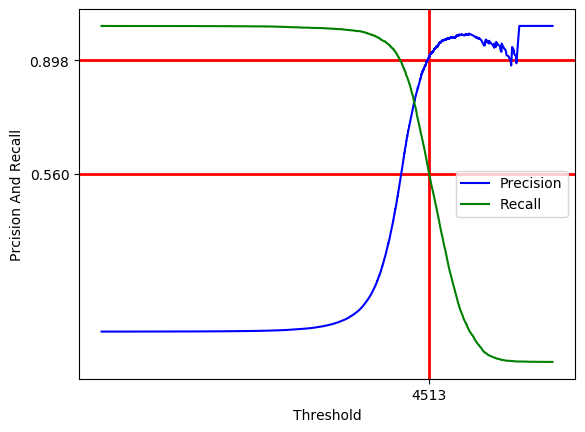

In [59]:
#Precision Recall Threshold trade off curve
import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precision,recalls,thresholds):
    plt.plot(thresholds, precision[:-1],"b-",label="Precision") 
                                                        # here precision[:-1] is given to omit the last precision
                                                           # value to match the length of the thresholds. The length of
                                                           # threshold is 1 less than precision and recall
    plt.plot(thresholds,recall[:-1],'g-',label="recall")
    plt.legend(('Precision', 'Recall'))
    plt.xlabel('Threshold')
    plt.ylabel('Prcision And Recall')
    plt.xticks([4513])
    plt.yticks([0.898,0.56])
    plt.grid(color='r', linestyle='-', linewidth=2)

    
plot_precision_recall_vs_threshold(precision,recall,thresholds)
plt.show()

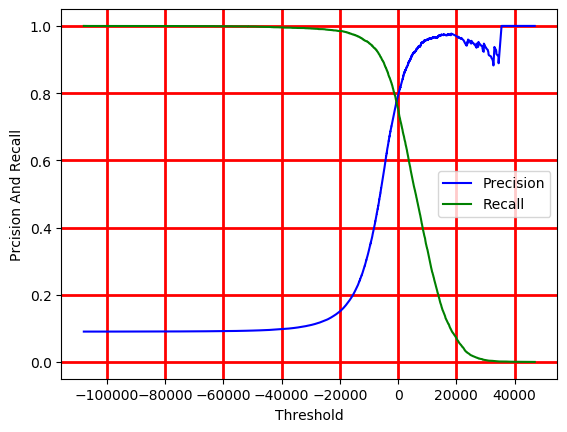


Observations:

Precision curve is bumpier than the recall curve. The reason is that precision may sometime go down when you raise the 
Threshold |Genarally it goes up but some time it may go down as well|. On the other hand, recall can only go down when 
the Threshold is increased, which explains why its curve looks smooth.



In [60]:
#Precision Recall Threshold trade off curve

import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precision,recalls,thresholds):
    plt.plot(thresholds, precision[:-1],"b-",label="Precision") 
                                                        # here precision[:-1] is given to omit the last precision
                                                           # value to match the length of the thresholds. The length of
                                                           # threshold is 1 less than precision and recall
    plt.plot(thresholds,recall[:-1],'g-',label="recall")
    plt.legend(('Precision', 'Recall'))
    plt.xlabel('Threshold')
    plt.ylabel('Prcision And Recall')
#    plt.xticks([4513])
#   plt.yticks([0.898,0.56])
    plt.grid(color='r', linestyle='-', linewidth=2)

    
plot_precision_recall_vs_threshold(precision,recall,thresholds)
plt.show()

print("""
Observations:

Precision curve is bumpier than the recall curve. The reason is that precision may sometime go down when you raise the 
Threshold |Genarally it goes up but some time it may go down as well|. On the other hand, recall can only go down when 
the Threshold is increased, which explains why its curve looks smooth.
""")

# Precision Versus Recall curve

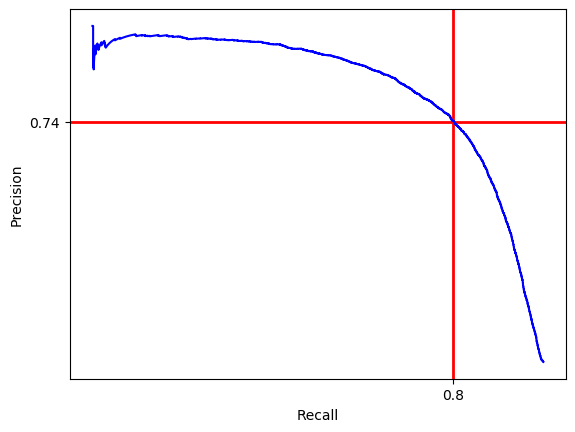

Observation: 
Precsion starts to fall sharply around 80% of Recall. So preferred precision/recall trade off i.e. Threshold value
to be selected is just before that drop i.e. around 60% recall.


In [61]:
#Precision Versus Recall curve
# Another way to select a good precsion/recall trade-off is to plot precison directly against recall.


import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precision,recalls,thresholds):
    plt.plot(recall, precision,"b-",label="Precision") 
                                                        # here precision[:-1] is given to omit the last precision
                                                           # value to match the length of the thresholds. The length of
                                                           # threshold is 1 less than precision and recall
    
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xticks([.8])
    plt.yticks([0.74])
    plt.grid(color='r', linestyle='-', linewidth=2)

    
plot_precision_recall_vs_threshold(precision,recall,thresholds)
plt.show()

print('''Observation: 
Precsion starts to fall sharply around 80% of Recall. So preferred precision/recall trade off i.e. Threshold value
to be selected is just before that drop i.e. around 60% recall.''')

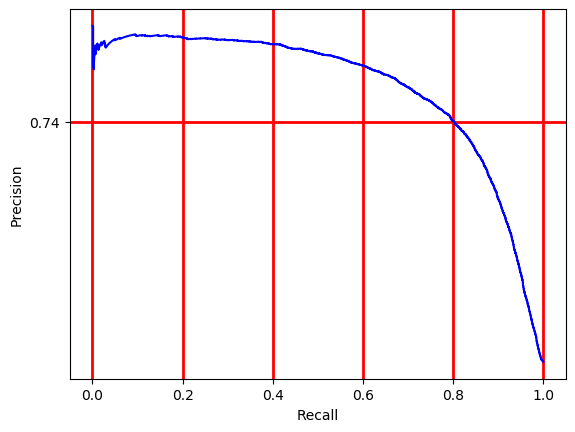

Observation: 
Precsion starts to fall sharply around 80% of Recall. So preferred precision/recall trade off i.e. Threshold value
to be selected is just before that drop i.e. around 60% recall.


In [62]:
#Precision Versus Recall curve
# Precsion starts to fall sharply around 80% of Recall.

import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precision,recalls,thresholds):
    plt.plot(recall, precision,"b-",label="Precision") 
                                                        # here precision[:-1] is given to omit the last precision
                                                           # value to match the length of the thresholds. The length of
                                                           # threshold is 1 less than precision and recall
    
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
 #   plt.xticks([.8])
    plt.yticks([0.74])
    plt.grid(color='r', linestyle='-', linewidth=2)

    
plot_precision_recall_vs_threshold(precision,recall,thresholds)
plt.show()
print('''Observation: 
Precsion starts to fall sharply around 80% of Recall. So preferred precision/recall trade off i.e. Threshold value
to be selected is just before that drop i.e. around 60% recall.''')

# Threshold value calculation for required precision

In [63]:
#Calculating the threshold for required precision for example precision of 95%using np.argmax()
threshold_95_precision=thresholds[np.argmax(precision>=0.95)]
print(threshold_95_precision)
y_train_pred_95=(y_scores>=threshold_95_precision)
precision_score(y_train_5,y_train_pred_95)
print(precision_score(y_train_5,y_train_pred_95))
recall_score(y_train_5,y_train_pred_95)
print(recall_score(y_train_5,y_train_pred_95))
#Note by setting the threshold for having higher precion the recall gets reduced.Remember a high precision classifier
# is not very useful if its recall is too low. If any one ask you to reach 99% precision then you should ask 
# at what recall.

8084.913329900757
0.950210970464135
0.4154215089466888


# ROC Curve-(Reciever operating characteristic)

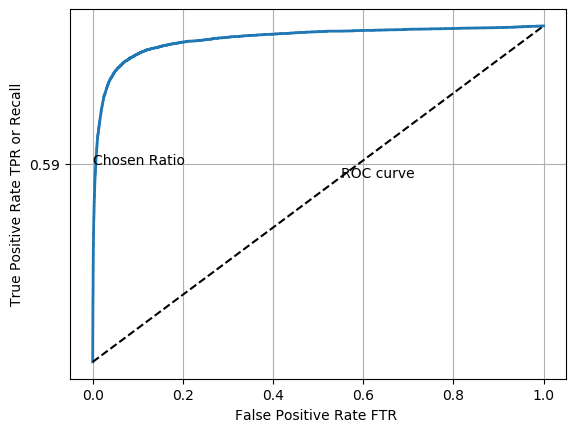

Observations:
Higher the TPR or Recall more the FPR False Possitive Rate
The Dotted line represents the ROC curve of a purly random classifier.
A good classifier stays as far as away from that line as possible (i.e. toward the top left corner)
The choosen ratio is at 59% of recall.



In [83]:
#ROC curve (Reciever operating characteristic)
#ROC curve plots the true positive rate (TPR or Recall or sensitivity) againist the false positive rate (FPR).
#roc_curve() function to compute the TPR and FPR for various threshold values:

# TPR = Sencitivity= Recall= TP/TP+FN
# FPR = Ratio of negative instances that are incorrectly classified as positive = 1-TNR =1-Specificity
# TNR = Specificity= Ratio of negative instances that are correctly classified as negative.
# ROC curve is plot of sensitivity or recall versus 1-Specificity

# TNR = TN/TN+FP = i.e it tells that in a total of actual negatives how many of them where predicted correctly as negative
# TN+FP = gives the total number of actual negatives.

from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores) # Technically roc_curve is a function to which you are passing 
                                             # the variables as y_train and y_score,
                                             #then the function is returning FPR, TPR and Thresholds.
                           ## (y_scores=cross_val_predict(alg_SGD_clf, X_train,y_train_5,cv=3, method='decision_function'))
    
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')  #dashed diagonal
    plt.plot([0],[.59],'--')
    plt.xlabel("False Positive Rate FTR ")
    plt.ylabel("True Positive Rate TPR or Recall")
    plt.yticks(ticks=[.59])
    plt.annotate("Chosen Ratio",[0,.59])
    plt.annotate("ROC curve",[.55,.55])
    plt.grid()
    
plot_roc_curve(fpr,tpr)
plt.show()
print("""Observations:
Higher the TPR or Recall more the FPR False Possitive Rate
The Dotted line represents the ROC curve of a purly random classifier.
A good classifier stays as far as away from that line as possible (i.e. toward the top left corner)
The choosen ratio is at 59% of recall.
""")

# Comparing the classfiers by measuring AUC( Area under curve)

In [81]:
#One way to compare the classifiers is to measure the area under the curve(AUC).
#A perfect classifier will have AUC of ROC as 1
#Purely random classifer will have ROC AUC as .5.
#AUC of ROC can be computed using roc_auc_score function
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9617244992804492

# Conclusion

In [85]:
print("""Since the ROC curve looks so similar to precision/recall (PR) curve, in oreder to under stand which one to use,
we need to consider the following points:
As a rule of thumb we prefere the PR curve whenever the poistive class is rare or when you care more about the false 
positives than the false negatives. Otherwise we use ROC curve.

In the above case ROC curve looks good but this is because there are few positive i.e 5's comparted to the negatives 
i.e non 5's. i.e. since the number of negatives or non 5's are more ROC curve looks good.
In contrast, the PR curve makes it clear that the classifer has room for imporvement(the PR curve could be
closer to the top right corner or TPR/FPR curve could be closer to the top left corner""")

Since the ROC curve looks so similar to precision/recall (PR) curve, in oreder to under stand which one to use,
we need to consider the following points:
As a rule of thumb we prefere the PR curve whenever the poistive class is rare or when you care more about the false 
positives than the false negatives. Otherwise we use ROC curve.

In the above case ROC curve looks good but this is because there are few positive i.e 5's comparted to the negatives 
i.e non 5's. i.e. since the number of negatives or non 5's are more ROC curve looks good.
In contrast, the PR curve makes it clear that the classifer has room for imporvement(the PR curve could be
closer to the top right corner or TPR/FPR curve could be closer to the top left corner
